In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scorecardpy as sc
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.float_format', lambda x: '%.5f' %x)

%matplotlib inline

In [2]:
#Assigment Part 1

In [3]:
#Exploratory Data Analysis of Dataset & Features

In [4]:
BGL = pd.read_csv("BGL Data.csv")

In [5]:
BGL.head()

,Renewal_Date,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,Vehicle_Liability_Category,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality
0,20160606,1,35.37000,0.00000,35.41000,376.77000,381.53000,269.42000,8,I,Passive,nan,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,NaN,9,581,0,OK
1,20160704,0,117.11000,14.55660,41.77000,444.66000,408.65000,242.61000,8,I,Passive,nan,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,3,9,526,0,OK
2,20160803,1,106.92000,43.53700,61.08000,649.08000,538.19000,398.45000,8,I,Passive,nan,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,NaN,7,586,1,OK
3,20160705,1,194.65000,99.85760,70.20000,746.76000,743.49000,299.46000,8,I,Passive,nan,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,11,9,540,0,OK
4,20160302,1,32.98000,19.09000,0.00000,303.93000,310.12000,224.23000,7,T,Passive,nan,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,4,8,531,1,OK


In [6]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 33 columns):
Renewal_Date                              10285 non-null int64
Sale                                      10285 non-null int64
Main_Income                               10285 non-null float64
Addon_Income                              10285 non-null float64
Finance_Income                            10285 non-null float64
Gross_Price                               10285 non-null float64
Last_Yr_Gross_Price                       10285 non-null float64
Net_Premium                               10285 non-null float64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null object
Renewal_Offer_Type                        10285 non-null object
Number_Of_Attempted_Policy_Ammendments    3000 non-null float64
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null 

In [7]:
BGL.isnull().sum()

Renewal_Date                                 0
Sale                                         0
Main_Income                                  0
Addon_Income                                 0
Finance_Income                               0
Gross_Price                                  0
Last_Yr_Gross_Price                          0
Net_Premium                                  0
Previous_Renewals                            0
First_Contact_Channel                        0
Renewal_Offer_Type                           0
Number_Of_Attempted_Policy_Ammendments    7285
Diver_Age                                    0
Driver_Marital_Status                        0
Driver_Occupation_Status                     0
Driver_Licence_Type                          0
Driver_Years_Licence_Held                    0
Geographical_Area                            0
Number_Of_Named_Drivers                      0
Overnight_Parking                            0
Annual_Mileage                               0
Vehicle_Age  

In [8]:
#Converting Date to appropriate Date Time Format

In [9]:
BGL['Date'] = pd.to_datetime(BGL['Renewal_Date'].astype(str), format='%Y%m%d')
BGL.drop('Renewal_Date', axis=1, inplace=True)

In [10]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 33 columns):
Sale                                      10285 non-null int64
Main_Income                               10285 non-null float64
Addon_Income                              10285 non-null float64
Finance_Income                            10285 non-null float64
Gross_Price                               10285 non-null float64
Last_Yr_Gross_Price                       10285 non-null float64
Net_Premium                               10285 non-null float64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null object
Renewal_Offer_Type                        10285 non-null object
Number_Of_Attempted_Policy_Ammendments    3000 non-null float64
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null object
Driver_Occupation_Status                  10285 non-null

In [11]:
BGL.head()

,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,Vehicle_Liability_Category,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality,Date
0,1,35.37000,0.00000,35.41000,376.77000,381.53000,269.42000,8,I,Passive,nan,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,NaN,9,581,0,OK,2016-06-06
1,0,117.11000,14.55660,41.77000,444.66000,408.65000,242.61000,8,I,Passive,nan,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,3,9,526,0,OK,2016-07-04
2,1,106.92000,43.53700,61.08000,649.08000,538.19000,398.45000,8,I,Passive,nan,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,NaN,7,586,1,OK,2016-08-03
3,1,194.65000,99.85760,70.20000,746.76000,743.49000,299.46000,8,I,Passive,nan,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,11,9,540,0,OK,2016-07-05
4,1,32.98000,19.09000,0.00000,303.93000,310.12000,224.23000,7,T,Passive,nan,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,4,8,531,1,OK,2016-03-02


In [12]:
#Analysis of Date Feature

In [13]:
BGL['Date'].nunique()

364

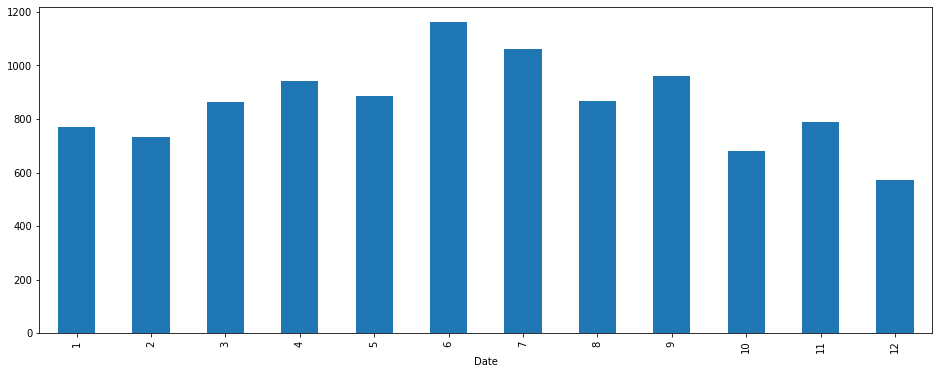

In [14]:
plt.figure(figsize=(16, 6))
BGL['Date'].groupby(BGL["Date"].dt.month).count().plot(kind="bar")

In [15]:
BGL['Date'].describe()

count                   10285
unique                    364
top       2016-08-11 00:00:00
freq                      173
first     2016-01-01 00:00:00
last      2016-12-31 00:00:00
Name: Date, dtype: object

In [16]:
#Analysis of Sale Feature which is the Target Feature for Part 2 of Assignment

In [17]:
BGL['Sale'].nunique()

2

In [18]:
BGL['Sale'].value_counts()

1    6291
0    3994
Name: Sale, dtype: int64

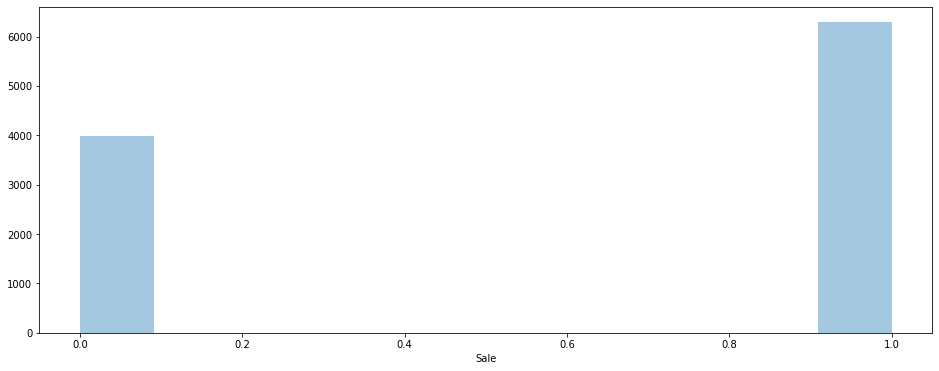

In [19]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Sale'], kde=False)

In [20]:
#Analysis of Main_Income Feature

In [21]:
BGL['Main_Income'].describe()

count   10285.00000
mean       63.41910
std        88.22067
min      -906.20000
25%         9.34000
50%        38.51000
75%        96.90000
max       700.00000
Name: Main_Income, dtype: float64

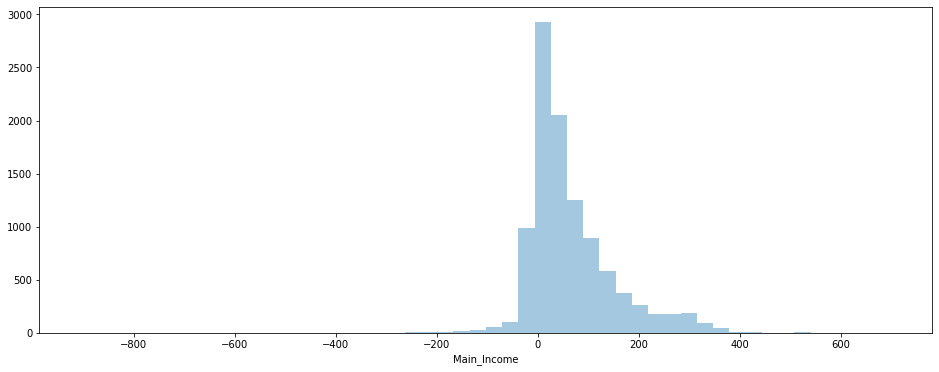

In [22]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Main_Income'], kde=False)

In [23]:
#Analysis of Addon_Income Feature

In [24]:
BGL['Addon_Income'].describe()

count   10285.00000
mean       24.40903
std        22.28824
min         0.00000
25%         6.10000
50%        19.63000
75%        35.64000
max       149.87660
Name: Addon_Income, dtype: float64

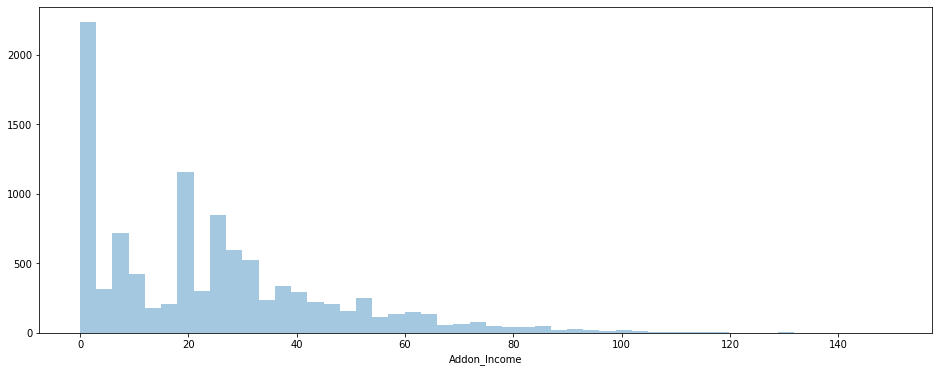

In [25]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Addon_Income'],kde=False)

In [26]:
#Analysis of Finance Income Feature

In [27]:
BGL['Finance_Income'].describe()

count   10285.00000
mean       39.86780
std        41.61858
min         0.00000
25%         0.00000
50%        37.92000
75%        61.81000
max       398.05000
Name: Finance_Income, dtype: float64

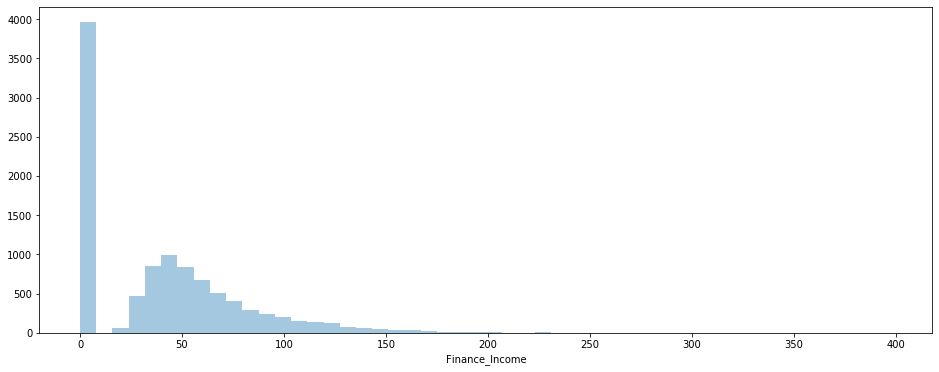

In [28]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Finance_Income'],kde=False)

In [29]:
#Analysis of Gross_Price Feature

In [30]:
BGL['Gross_Price'].describe()

count   10285.00000
mean      602.56108
std       344.62021
min         0.00000
25%       378.12000
50%       508.44000
75%       724.82000
max      4233.05000
Name: Gross_Price, dtype: float64

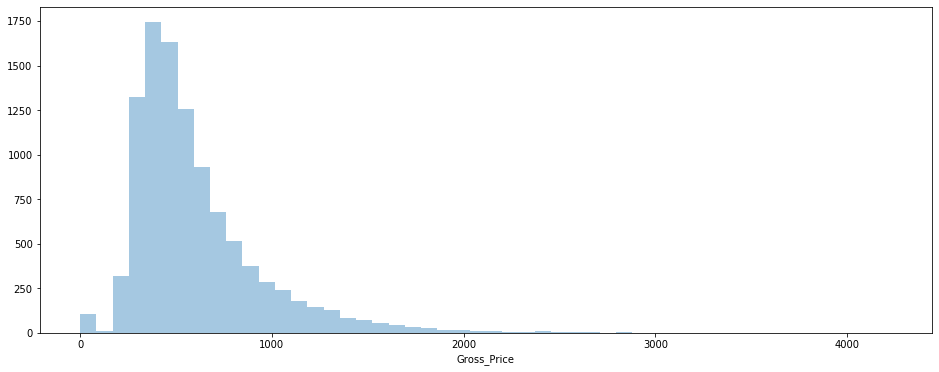

In [31]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Gross_Price'], kde=False)

In [32]:
#Analysis of Last_Yr_Gross_Price

In [33]:
BGL['Last_Yr_Gross_Price'].describe()

count   10285.00000
mean      540.05114
std       328.72860
min       139.88000
25%       334.41000
50%       440.39000
75%       629.97000
max      4278.99000
Name: Last_Yr_Gross_Price, dtype: float64

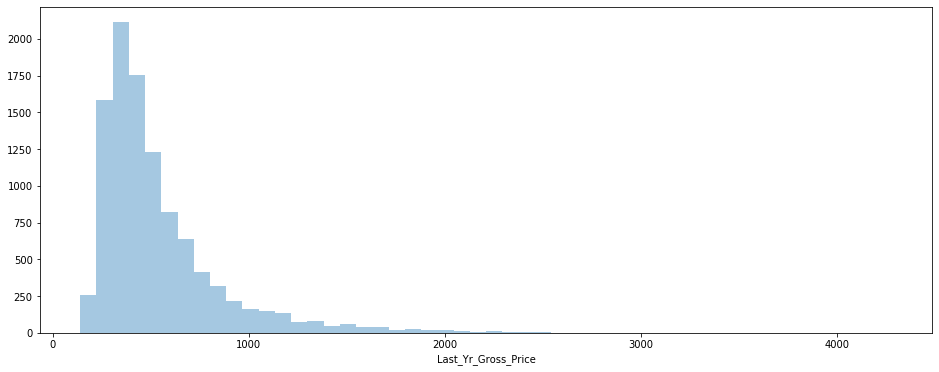

In [34]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Last_Yr_Gross_Price'],kde=False)

In [35]:
#Analysis of Net_Premium Feature

In [36]:
BGL['Net_Premium'].describe()

count   10285.00000
mean      420.72964
std       234.50151
min         0.00000
25%       274.10000
50%       358.83000
75%       497.16000
max      3118.68000
Name: Net_Premium, dtype: float64

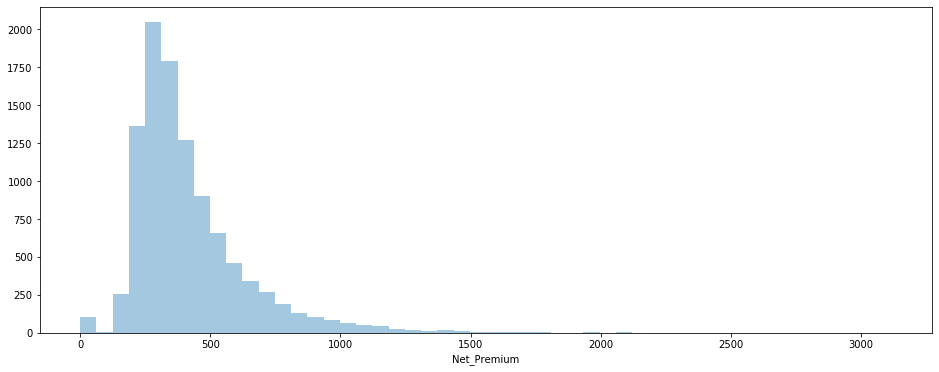

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Net_Premium'], kde=False)

In [38]:
Monetary = BGL[['Main_Income','Addon_Income','Finance_Income','Gross_Price','Last_Yr_Gross_Price','Net_Premium']]

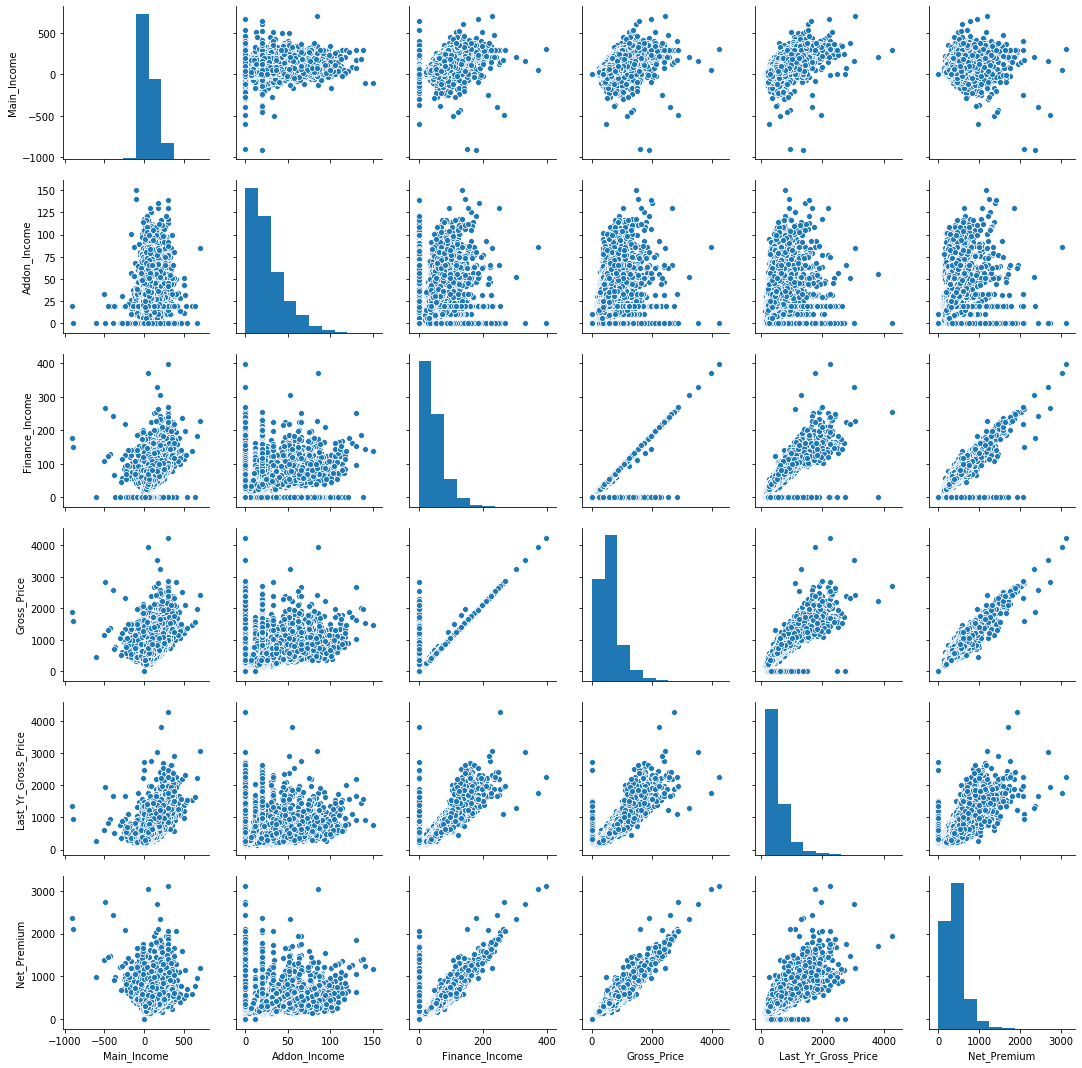

In [39]:
sns.pairplot(Monetary)

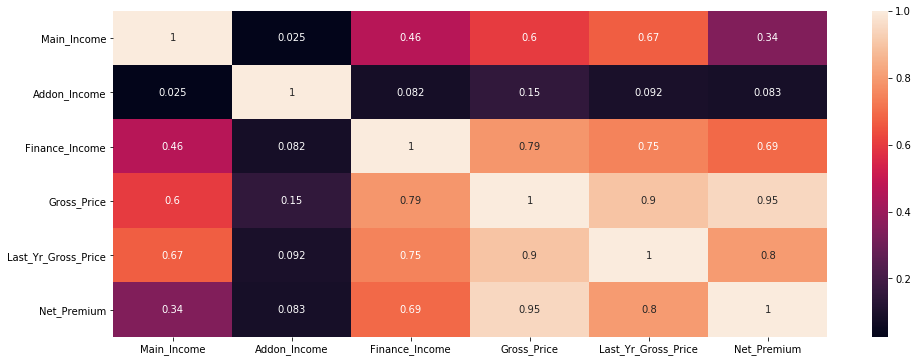

In [40]:
plt.figure(figsize=(16, 6))
sns.heatmap(Monetary.corr(), annot = True)

In [41]:
#Analysis of Previous_Renewals Feature

In [42]:
BGL['Previous_Renewals'].nunique()

10

In [43]:
BGL['Previous_Renewals'].value_counts()

0    4718
1    2952
2    1092
3     596
5     258
6     240
4     233
7     176
8      19
9       1
Name: Previous_Renewals, dtype: int64

In [44]:
BGL['Previous_Renewals'].describe()

count   10285.00000
mean        1.16471
std         1.63439
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         9.00000
Name: Previous_Renewals, dtype: float64

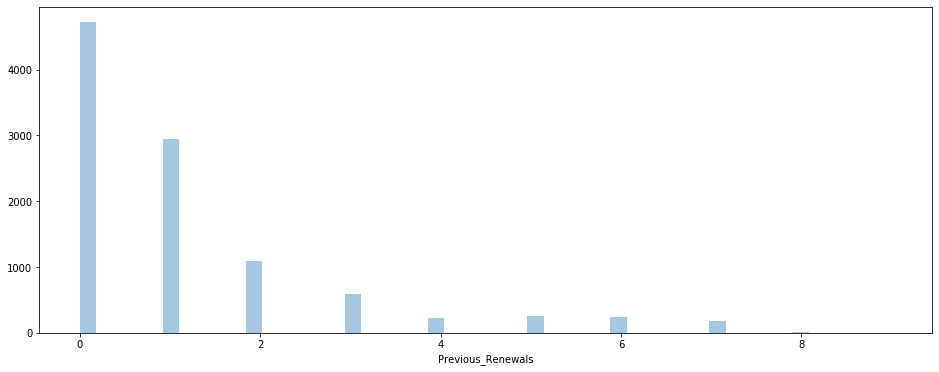

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Previous_Renewals'], kde=False)

In [46]:
#Analysis of First_Contact_Channel Feature

In [47]:
BGL['First_Contact_Channel'].nunique()

2

In [48]:
BGL['First_Contact_Channel'].value_counts()

I    9896
T     389
Name: First_Contact_Channel, dtype: int64

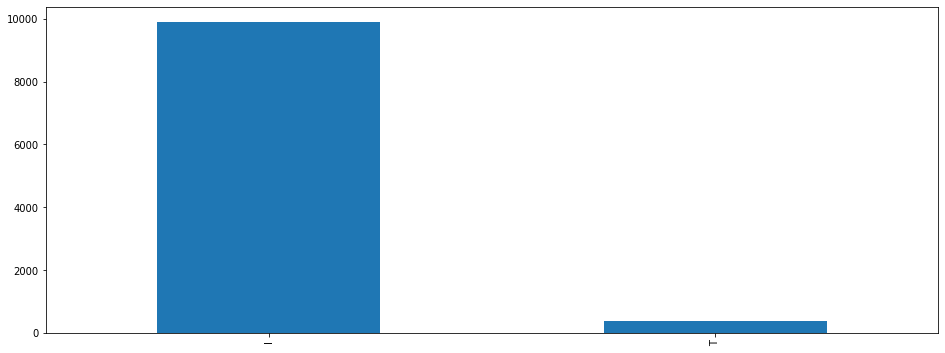

In [49]:
plt.figure(figsize=(16, 6))
BGL['First_Contact_Channel'].value_counts().plot(kind='bar')

In [50]:
#Analysis of Renewal_Offer_Type Feature

In [51]:
BGL['Renewal_Offer_Type'].nunique()

2

In [52]:
BGL['Renewal_Offer_Type'].value_counts()

Passive    9894
Active      391
Name: Renewal_Offer_Type, dtype: int64

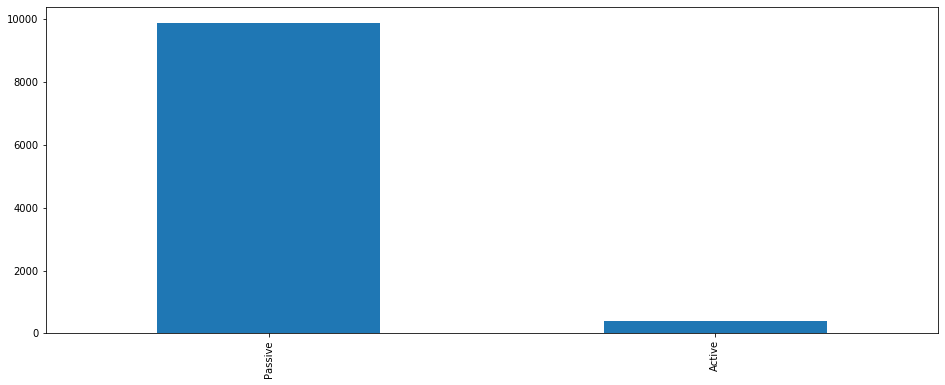

In [53]:
plt.figure(figsize=(16, 6))
BGL['Renewal_Offer_Type'].value_counts().plot(kind='bar')

In [54]:
#Analysis of Number_Of_Attempted_Policy_Amendments Feature

In [55]:
BGL['Number_Of_Attempted_Policy_Ammendments'].nunique()

21

In [56]:
BGL['Number_Of_Attempted_Policy_Ammendments'].value_counts()

1.00000     1760
2.00000      643
3.00000      268
4.00000      126
5.00000       84
6.00000       41
8.00000       15
7.00000       15
11.00000      11
10.00000       8
9.00000        8
13.00000       5
15.00000       3
16.00000       3
14.00000       3
12.00000       2
24.00000       1
20.00000       1
21.00000       1
25.00000       1
18.00000       1
Name: Number_Of_Attempted_Policy_Ammendments, dtype: int64

In [57]:
BGL['Number_Of_Attempted_Policy_Ammendments'].isnull().sum()

7285

In [58]:
BGL['Number_Of_Attempted_Policy_Ammendments'] = BGL['Number_Of_Attempted_Policy_Ammendments'].fillna(0)

In [59]:
BGL['Number_Of_Attempted_Policy_Ammendments'].isnull().sum()

0

In [60]:
BGL['Number_Of_Attempted_Policy_Ammendments'].value_counts()

0.00000     7285
1.00000     1760
2.00000      643
3.00000      268
4.00000      126
5.00000       84
6.00000       41
7.00000       15
8.00000       15
11.00000      11
10.00000       8
9.00000        8
13.00000       5
15.00000       3
14.00000       3
16.00000       3
12.00000       2
24.00000       1
20.00000       1
21.00000       1
25.00000       1
18.00000       1
Name: Number_Of_Attempted_Policy_Ammendments, dtype: int64

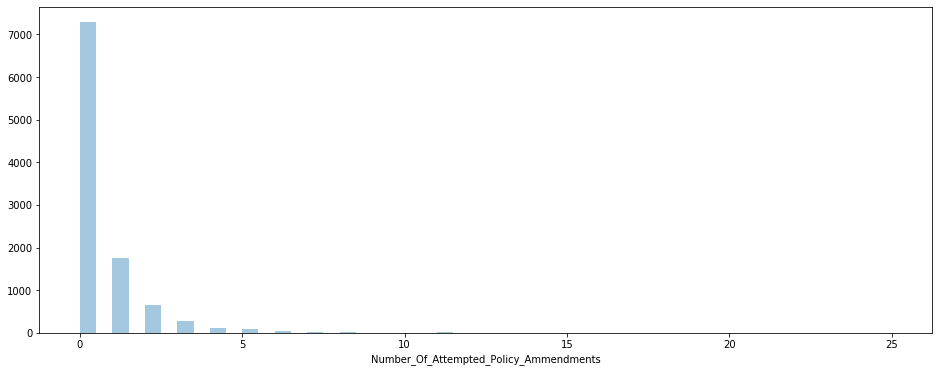

In [61]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Number_Of_Attempted_Policy_Ammendments'], kde=False)

In [62]:
#Analysis of Diver_Age Feature

In [63]:
BGL['Diver_Age'].nunique()

56

In [64]:
BGL['Diver_Age'].describe()

count   10285.00000
mean       47.77589
std        12.57994
min        23.00000
25%        39.00000
50%        48.00000
75%        56.00000
max        78.00000
Name: Diver_Age, dtype: float64

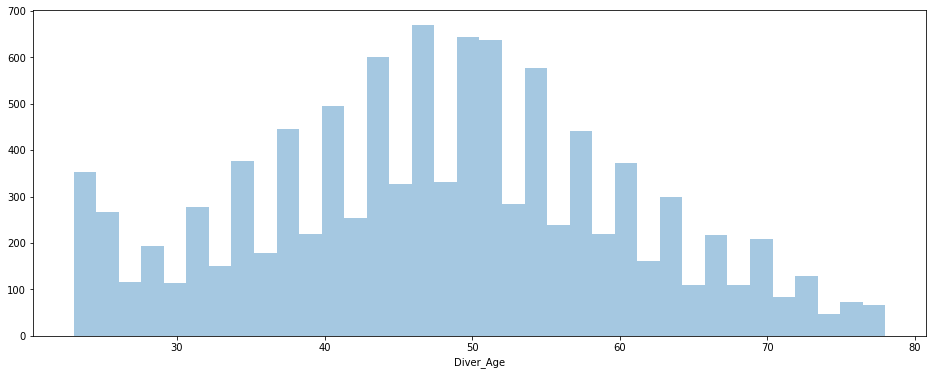

In [65]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Diver_Age'],kde=False)

In [66]:
#Analysis of Driver_Marital_Status Feature

In [67]:
BGL['Driver_Marital_Status'].nunique()

7

In [68]:
BGL['Driver_Marital_Status'].value_counts()

M    4844
P    2164
S    1991
D     828
W     211
A     192
B      55
Name: Driver_Marital_Status, dtype: int64

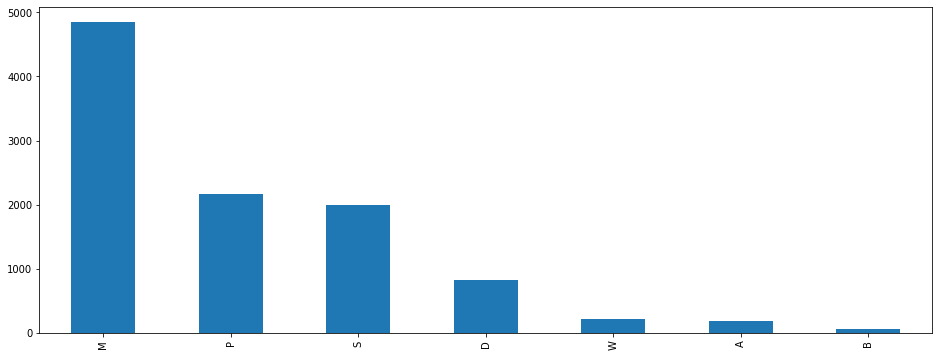

In [69]:
plt.figure(figsize=(16, 6))
BGL['Driver_Marital_Status'].value_counts().plot(kind='bar')

In [70]:
#Analysis of Driver_Occupation_Status Feature

In [71]:
BGL['Driver_Occupation_Status'].nunique()

7

In [72]:
BGL['Driver_Occupation_Status'].value_counts()

E    7525
S     951
R     945
H     444
U     321
N      90
F       9
Name: Driver_Occupation_Status, dtype: int64

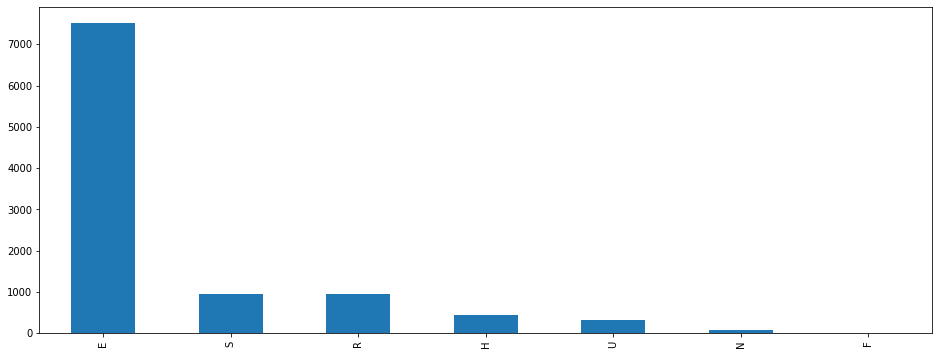

In [73]:
plt.figure(figsize=(16, 6))
BGL['Driver_Occupation_Status'].value_counts().plot(kind='bar')

In [74]:
#Analysis of Driver_Licence_Type Feature

In [75]:
BGL['Driver_Licence_Type'].nunique()

6

In [76]:
BGL['Driver_Licence_Type'].value_counts()

Z    8698
Y    1377
4     104
3      40
6      40
5      26
Name: Driver_Licence_Type, dtype: int64

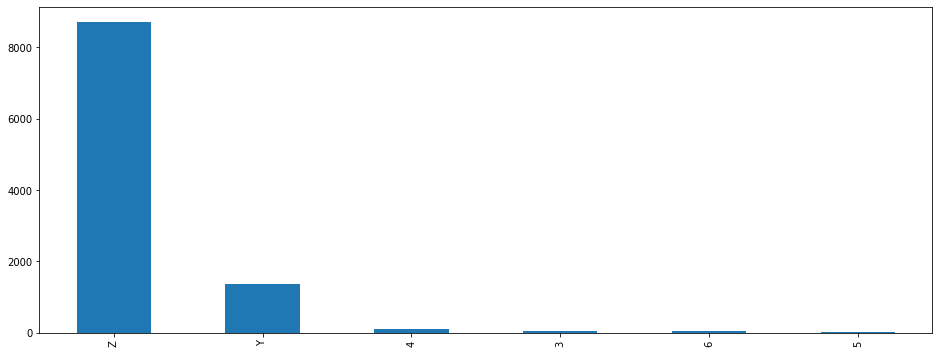

In [77]:
plt.figure(figsize=(16, 6))
BGL['Driver_Licence_Type'].value_counts().plot(kind='bar')

In [78]:
#Analysis of Driver_Years_Licence_Held Feature

In [79]:
BGL['Driver_Years_Licence_Held'].nunique()

60

In [80]:
BGL['Driver_Years_Licence_Held'].describe()

count   10285.00000
mean       19.85474
std         9.05825
min         0.00000
25%        14.00000
50%        21.00000
75%        26.00000
max        61.00000
Name: Driver_Years_Licence_Held, dtype: float64

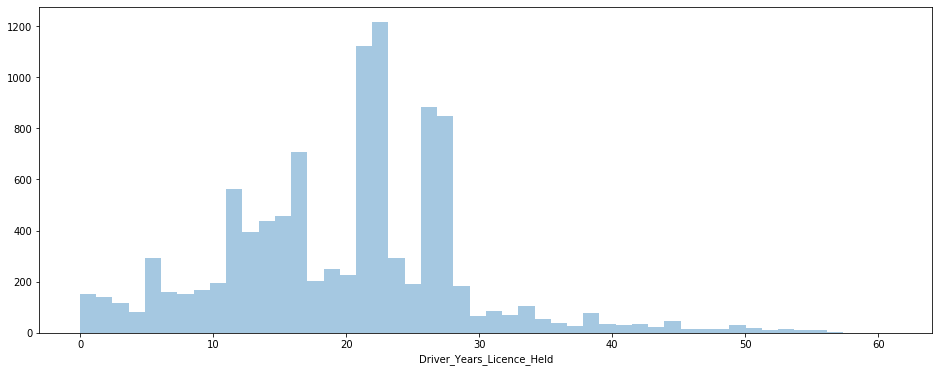

In [81]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Driver_Years_Licence_Held'],kde=False)

In [82]:
#Analysis of Geographical_Area Feature

In [83]:
BGL['Geographical_Area'].nunique()

12

In [84]:
BGL['Geographical_Area'].value_counts()

3     1342
4     1337
9     1176
10    1160
11    1135
2      853
7      838
8      707
1      538
5      507
12     365
6      327
Name: Geographical_Area, dtype: int64

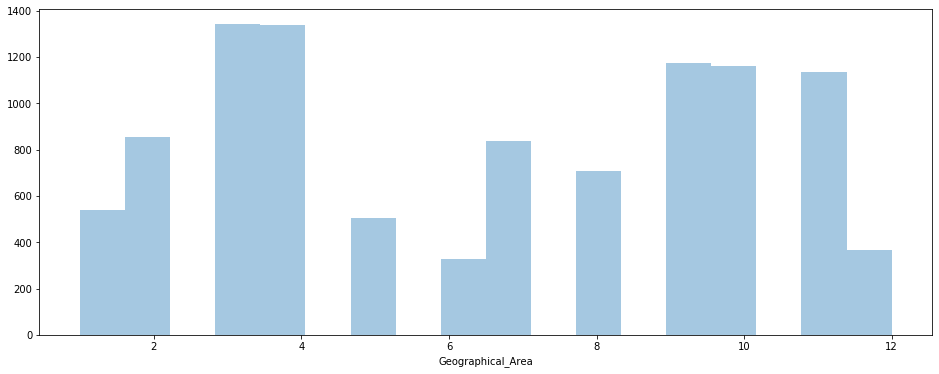

In [85]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Geographical_Area'], kde=False)

In [86]:
##Analysis of Number_Of_Named_Drivers Feature

In [87]:
BGL['Number_Of_Named_Drivers'].nunique()

3

In [88]:
BGL['Number_Of_Named_Drivers'].value_counts()

0    8043
1    1965
2     277
Name: Number_Of_Named_Drivers, dtype: int64

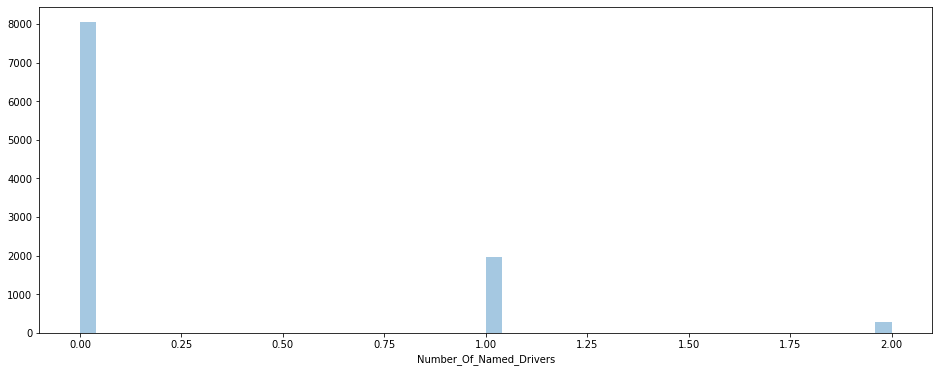

In [89]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Number_Of_Named_Drivers'], kde=False)

In [90]:
#Analysis of Overnight_Parking Feature

In [91]:
BGL['Overnight_Parking'].nunique()

6

In [92]:
BGL['Overnight_Parking'].value_counts()

4    5946
3    2225
1    1517
5     355
2     169
7      73
Name: Overnight_Parking, dtype: int64

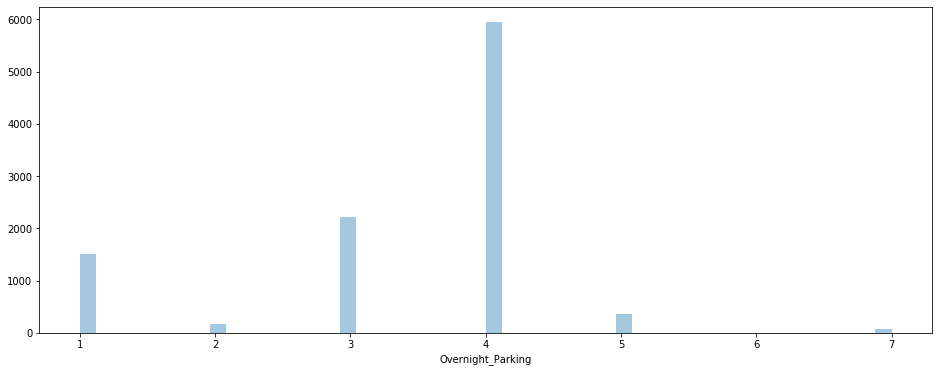

In [93]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Overnight_Parking'], kde=False)

In [94]:
#Analysis of Annual_Mileage Feature

In [95]:
BGL['Annual_Mileage'].nunique()

117

In [96]:
BGL['Annual_Mileage'].describe()

count   10285.00000
mean     7872.21196
std      3536.93613
min       200.00000
25%      5000.00000
50%      7999.00000
75%     10000.00000
max     25000.00000
Name: Annual_Mileage, dtype: float64

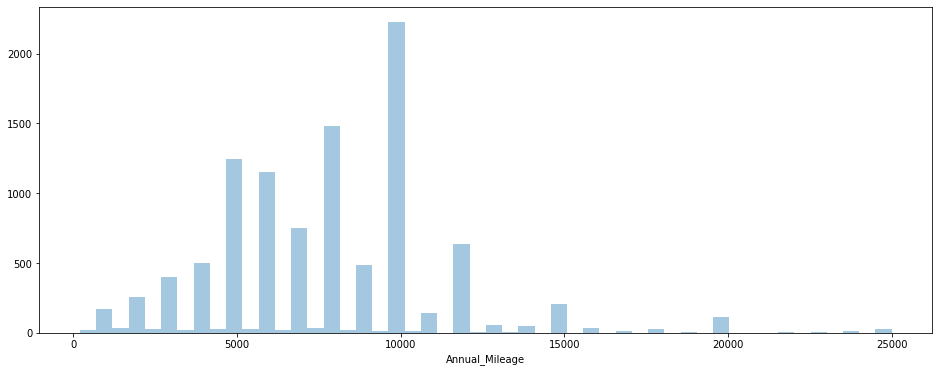

In [97]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Annual_Mileage'],kde=False)

In [98]:
#Analysis of Vehicle_Age Feature

In [99]:
BGL['Vehicle_Age'].nunique()

34

In [100]:
BGL['Vehicle_Age'].describe()

count   10285.00000
mean        7.95819
std         4.66483
min         0.00000
25%         4.00000
50%         8.00000
75%        11.00000
max        33.00000
Name: Vehicle_Age, dtype: float64

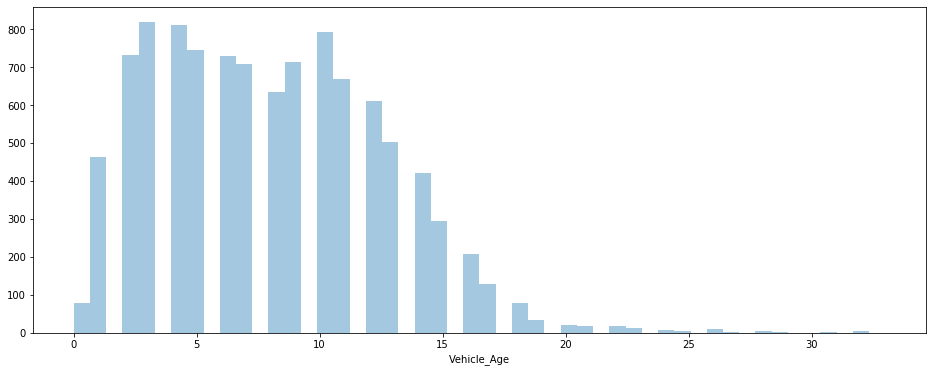

In [101]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Vehicle_Age'],kde=False)

In [102]:
#Analysis of Vehicle_Years_Owned Feature

In [103]:
BGL['Vehicle_Years_Owned'].nunique()

23

In [104]:
BGL['Vehicle_Years_Owned'].describe()

count   10285.00000
mean        2.91804
std         2.71303
min         0.00000
25%         1.00000
50%         2.00000
75%         4.00000
max        29.00000
Name: Vehicle_Years_Owned, dtype: float64

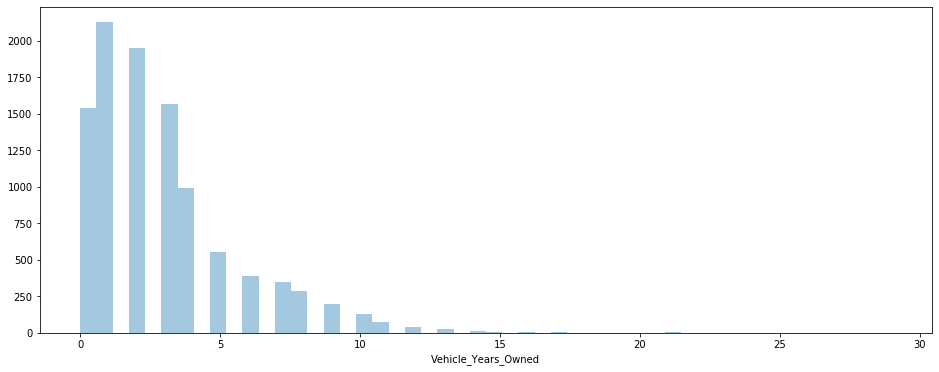

In [105]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Vehicle_Years_Owned'],kde=False)

In [106]:
#Analysis of Vehicle_Body_Type Feature

In [107]:
BGL['Vehicle_Body_Type'].nunique()

5

In [108]:
BGL['Vehicle_Body_Type'].value_counts()

H    6006
E    2898
S     976
B     228
C     177
Name: Vehicle_Body_Type, dtype: int64

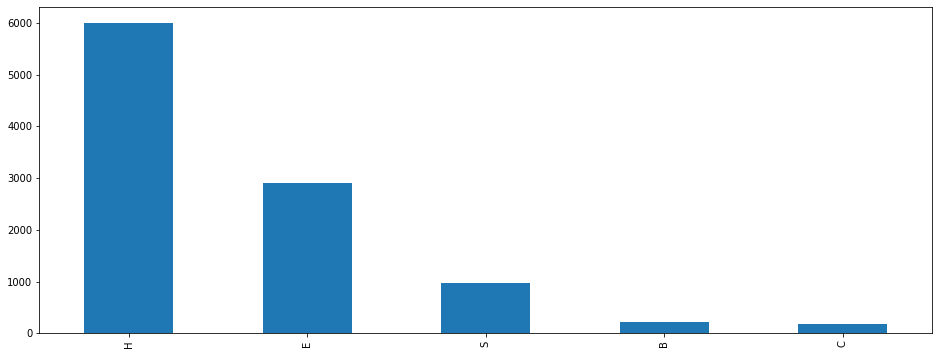

In [109]:
plt.figure(figsize=(16, 6))
BGL['Vehicle_Body_Type'].value_counts().plot(kind='bar')

In [110]:
#Analysis of Vehicle_No_Of_Doors Feature

In [111]:
BGL['Vehicle_No_Of_Doors'].nunique()

4

In [112]:
BGL['Vehicle_No_Of_Doors'].value_counts()

5    7605
3    1297
4     978
2     405
Name: Vehicle_No_Of_Doors, dtype: int64

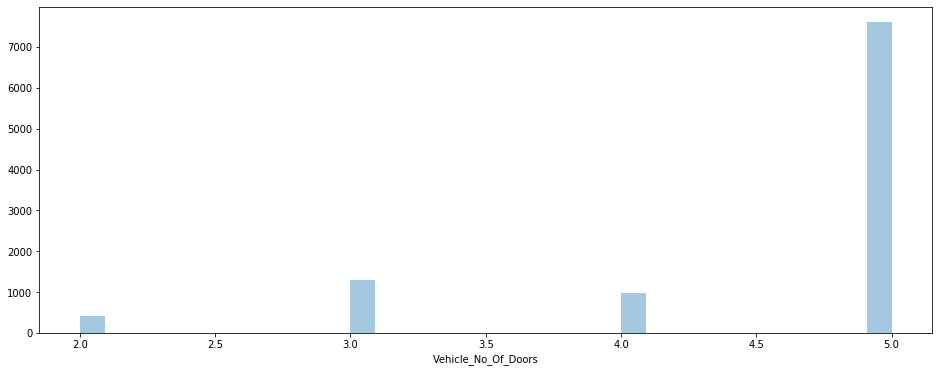

In [113]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Vehicle_No_Of_Doors'], kde=False)

In [114]:
#Analysis of Vehicle_Engine_Size Feature

In [115]:
BGL['Vehicle_Engine_Size'].nunique()

278

In [116]:
BGL['Vehicle_Engine_Size'].describe()

count   10285.00000
mean     1754.81449
std       444.39703
min         0.00000
25%      1461.00000
50%      1686.00000
75%      1995.00000
max      4701.00000
Name: Vehicle_Engine_Size, dtype: float64

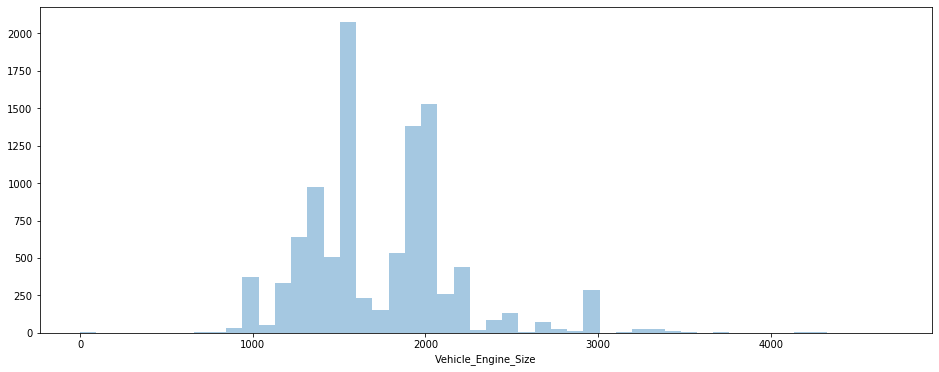

In [117]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Vehicle_Engine_Size'],kde=False)

In [118]:
#Analysis of Vehicle_Fuel_Type Feature

In [119]:
BGL['Vehicle_Fuel_Type'].nunique()

3

In [120]:
BGL['Vehicle_Fuel_Type'].value_counts()

D    5520
P    4760
E       5
Name: Vehicle_Fuel_Type, dtype: int64

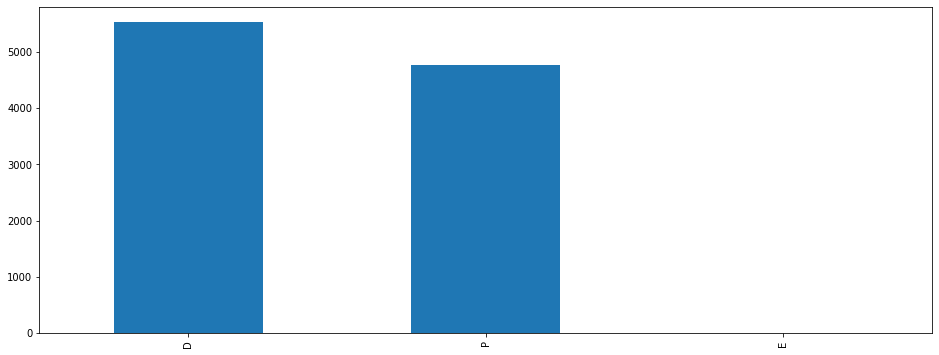

In [121]:
plt.figure(figsize=(16, 6))
BGL['Vehicle_Fuel_Type'].value_counts().plot(kind='bar')

In [122]:
#Analysis of Vehicle_Transmission Feature

In [123]:
BGL['Vehicle_Transmission'].nunique()

2

In [124]:
BGL['Vehicle_Transmission'].value_counts()

M    7536
A    2749
Name: Vehicle_Transmission, dtype: int64

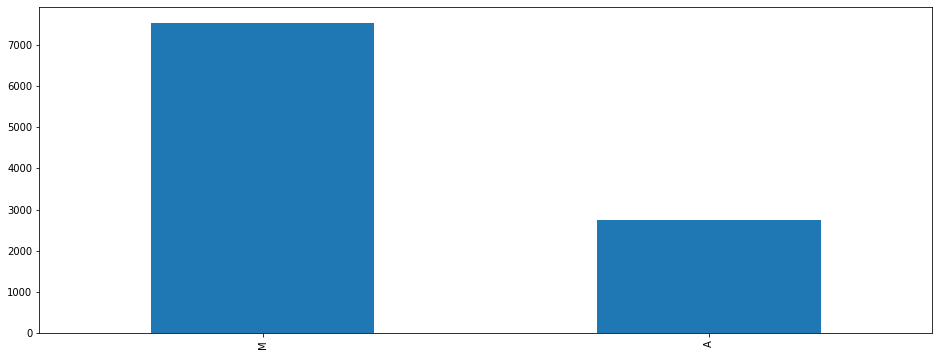

In [125]:
plt.figure(figsize=(16, 6))
BGL['Vehicle_Transmission'].value_counts().plot(kind='bar')

In [126]:
#Analysis of Vehicle_Liabilty_Analysis Feature

In [127]:
BGL['Vehicle_Liability_Category'].nunique()

21

In [128]:
BGL['Vehicle_Liability_Category'].value_counts()

6     670
7     603
4     581
5     547
8     423
11    419
12    405
10    378
14    368
3     355
9     283
13    275
15    231
2     162
16    157
17    128
1      96
18     47
19     12
20      3
        2
Name: Vehicle_Liability_Category, dtype: int64

In [129]:
BGL['Vehicle_Liability_Category'].isnull().sum()

4140

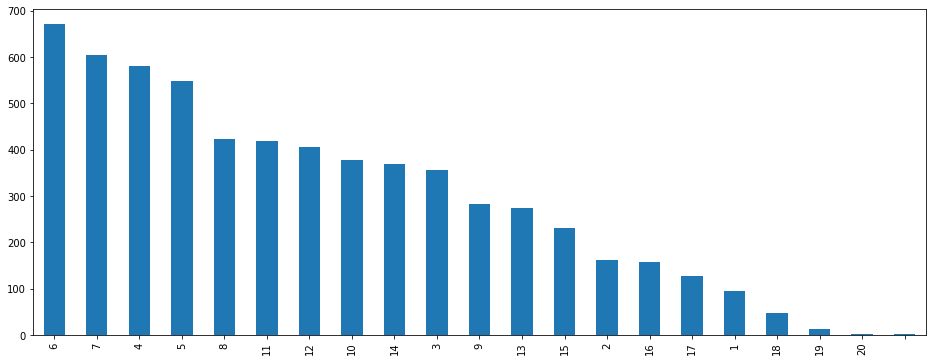

In [130]:
plt.figure(figsize=(16, 6))
BGL['Vehicle_Liability_Category'].value_counts().plot(kind='bar')

In [131]:
#Analysis of No_Claims_Discount

In [132]:
BGL['No_Claims_Discount'].nunique()

10

In [133]:
BGL['No_Claims_Discount'].value_counts()

9    6908
2     494
3     486
1     457
4     449
5     364
6     355
8     353
7     321
0      98
Name: No_Claims_Discount, dtype: int64

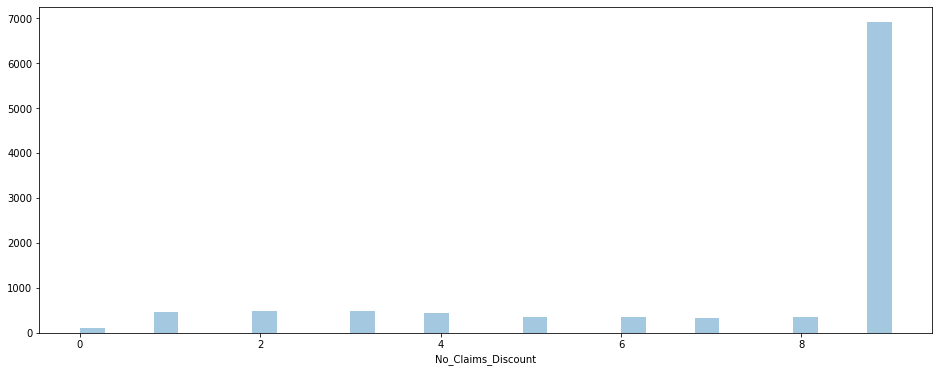

In [134]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['No_Claims_Discount'],kde=False)

In [135]:
#Analysis of Credit_Score Feature

In [136]:
BGL['Credit_Score'].nunique()

204

In [137]:
BGL['Credit_Score'].describe()

count   10285.00000
mean      567.95090
std       385.20246
min       426.00000
25%       537.00000
50%       558.00000
75%       575.00000
max      9999.00000
Name: Credit_Score, dtype: float64

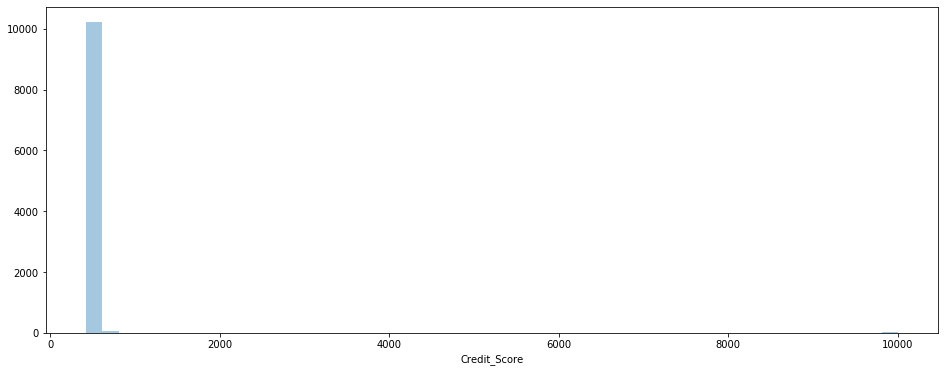

In [138]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Credit_Score'],kde=False)

In [139]:
#Analysis of Previous_Discount Feature

In [140]:
BGL['Previous_Discount'].nunique()

2

In [141]:
BGL['Previous_Discount'].value_counts()

0    9248
1    1037
Name: Previous_Discount, dtype: int64

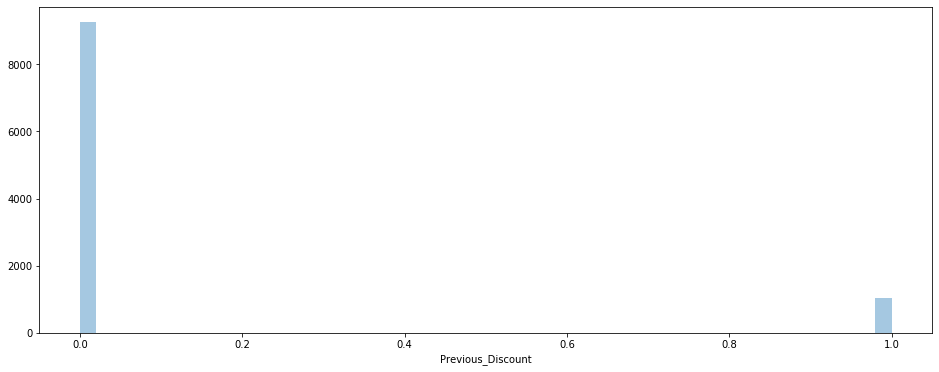

In [142]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Previous_Discount'],kde=False)

In [143]:
#Analysis of Data_Quality Feature

In [144]:
BGL['Data_Quality'].nunique()

4

In [145]:
BGL['Data_Quality'].value_counts()

OK                            10167
Unacceptable                    106
Quote Total Premium Error         9
Policy Total Premium Error        3
Name: Data_Quality, dtype: int64

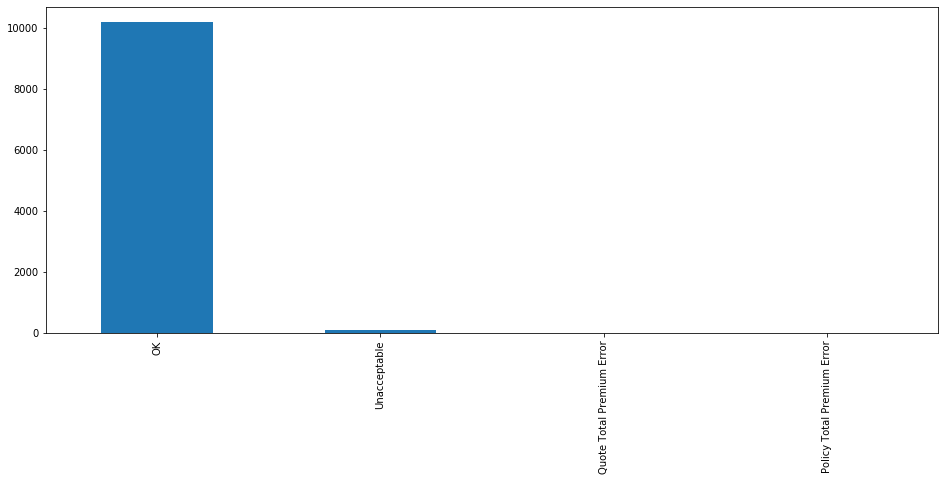

In [146]:
plt.figure(figsize=(16, 6))
BGL['Data_Quality'].value_counts().plot(kind='bar')

In [147]:
#IPO creation and Analysis

In [148]:
BGL['IPO'] = (BGL['Sale'] * (BGL['Main_Income'] + BGL['Addon_Income'] + BGL ['Finance_Income']))

In [149]:
BGL.head()

,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,Vehicle_Liability_Category,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality,Date,IPO
0,1,35.37000,0.00000,35.41000,376.77000,381.53000,269.42000,8,I,Passive,0.00000,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,NaN,9,581,0,OK,2016-06-06,70.78000
1,0,117.11000,14.55660,41.77000,444.66000,408.65000,242.61000,8,I,Passive,0.00000,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,3,9,526,0,OK,2016-07-04,0.00000
2,1,106.92000,43.53700,61.08000,649.08000,538.19000,398.45000,8,I,Passive,0.00000,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,NaN,7,586,1,OK,2016-08-03,211.53700
3,1,194.65000,99.85760,70.20000,746.76000,743.49000,299.46000,8,I,Passive,0.00000,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,11,9,540,0,OK,2016-07-05,364.70760
4,1,32.98000,19.09000,0.00000,303.93000,310.12000,224.23000,7,T,Passive,0.00000,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,4,8,531,1,OK,2016-03-02,52.07000


In [150]:
BGL['IPO'].describe()

count   10285.00000
mean       77.13887
std       108.52392
min      -709.39000
25%         0.00000
50%        37.22000
75%       118.28000
max      1013.51000
Name: IPO, dtype: float64

In [151]:
#Number of IPOs that are equal to 0 and not

In [152]:
(BGL['IPO'] == 0.0).astype(float).sum()

4021.0

In [153]:
(BGL['IPO'] != 0.0).astype(float).sum()

6264.0

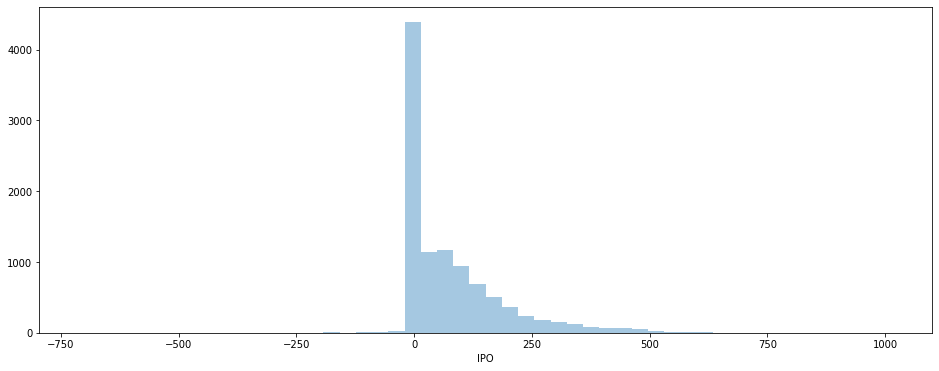

In [154]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['IPO'],kde=False)

In [155]:
#Creation of Dataset BGL_Sale_1 for IPO Customer Performance Analysis

In [156]:
BGL_Sale_1 = BGL[BGL.IPO != 0]

In [157]:
BGL_Sale_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6264 entries, 0 to 10282
Data columns (total 34 columns):
Sale                                      6264 non-null int64
Main_Income                               6264 non-null float64
Addon_Income                              6264 non-null float64
Finance_Income                            6264 non-null float64
Gross_Price                               6264 non-null float64
Last_Yr_Gross_Price                       6264 non-null float64
Net_Premium                               6264 non-null float64
Previous_Renewals                         6264 non-null int64
First_Contact_Channel                     6264 non-null object
Renewal_Offer_Type                        6264 non-null object
Number_Of_Attempted_Policy_Ammendments    6264 non-null float64
Diver_Age                                 6264 non-null int64
Driver_Marital_Status                     6264 non-null object
Driver_Occupation_Status                  6264 non-null object
Driver

In [158]:
BGL_Sale_1.head()

,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,Vehicle_Liability_Category,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality,Date,IPO
0,1,35.37000,0.00000,35.41000,376.77000,381.53000,269.42000,8,I,Passive,0.00000,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,NaN,9,581,0,OK,2016-06-06,70.78000
2,1,106.92000,43.53700,61.08000,649.08000,538.19000,398.45000,8,I,Passive,0.00000,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,NaN,7,586,1,OK,2016-08-03,211.53700
3,1,194.65000,99.85760,70.20000,746.76000,743.49000,299.46000,8,I,Passive,0.00000,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,11,9,540,0,OK,2016-07-05,364.70760
4,1,32.98000,19.09000,0.00000,303.93000,310.12000,224.23000,7,T,Passive,0.00000,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,4,8,531,1,OK,2016-03-02,52.07000
7,1,42.92000,23.15000,26.88000,285.50000,298.50000,169.41000,7,I,Passive,0.00000,54,P,E,Z,17,10,0,4,10000,17,3,H,5,1868,D,M,4,9,561,0,OK,2016-04-01,92.95000


In [159]:
#IPO performance based on Driver_Marital_Status

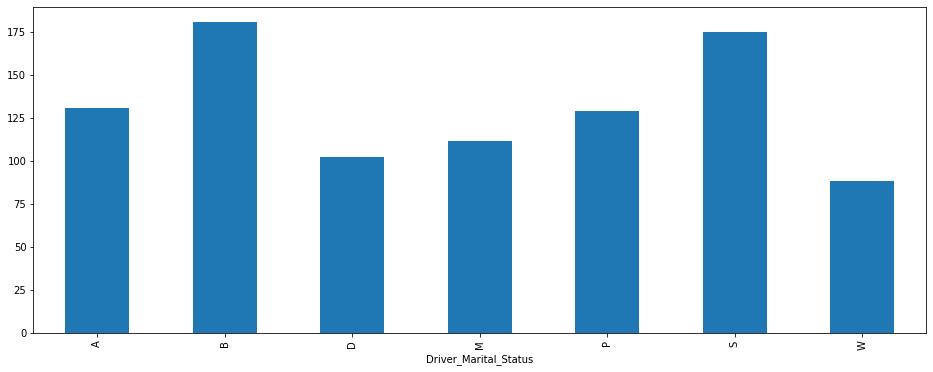

In [160]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Driver_Marital_Status"]).mean().plot(kind ='bar')

In [161]:
#IPO performance based on Driver_Occupation_Status

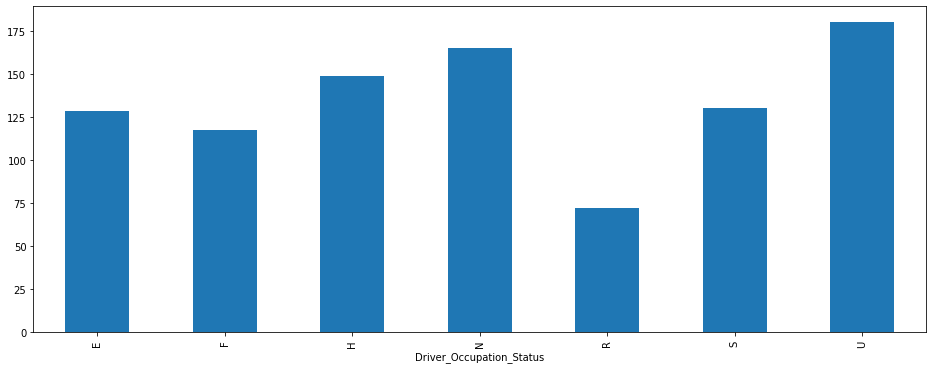

In [162]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Driver_Occupation_Status"]).mean().plot(kind ='bar')

In [163]:
#IPO performance based on Driver_Licence_Type

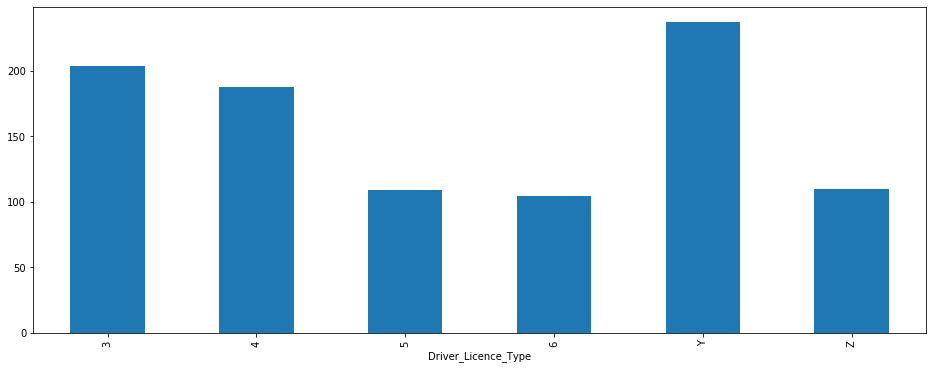

In [164]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Driver_Licence_Type"]).mean().plot(kind ='bar')

In [165]:
#IPO performance based on Geographical_Area

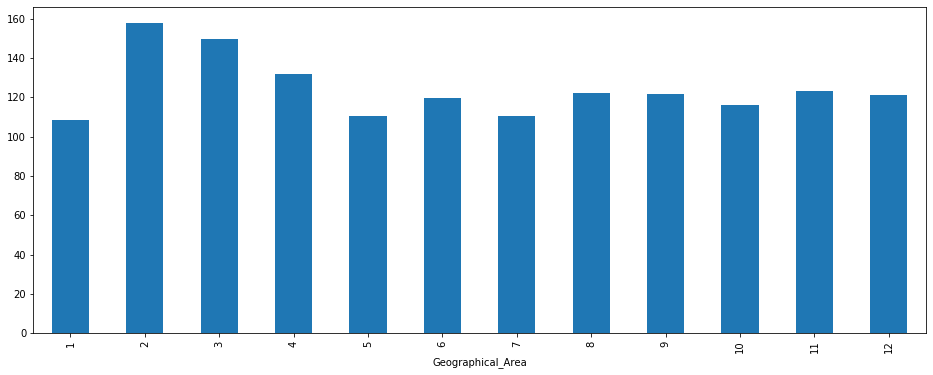

In [166]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Geographical_Area"]).mean().plot(kind ='bar')

In [167]:
#IPO performance based on Diver_Age

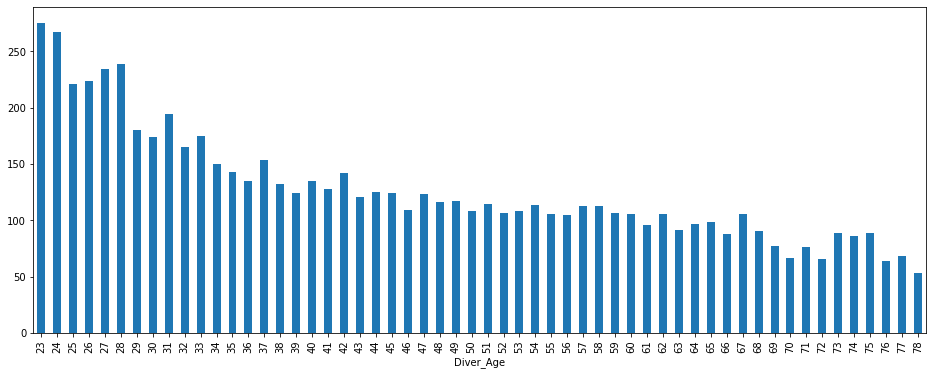

In [168]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Diver_Age"]).mean().plot(kind ='bar')

In [169]:
#IPO performance based on Driver_Years_LicenceDate_Held

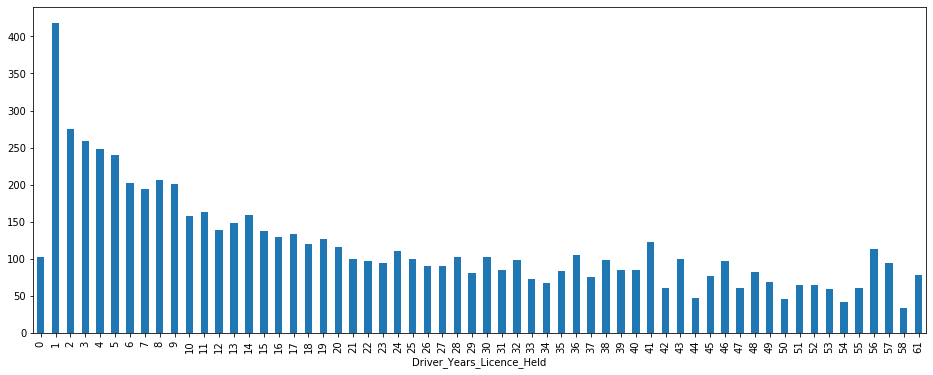

In [170]:
plt.figure(figsize=(16, 6))
BGL_Sale_1['IPO'].groupby(BGL_Sale_1["Driver_Years_Licence_Held"]).mean().plot(kind ='bar')

In [171]:
#Assignment Part 2

In [172]:
#Preparation of Dataset for Modelling

In [173]:
#Unimportant Features Dropped

In [174]:
BGL = BGL.drop(['Main_Income', 'Addon_Income', 'Finance_Income','Net_Premium','Data_Quality','Date','Vehicle_Liability_Category','IPO'], axis=1)

In [175]:
BGL.head()

,Sale,Gross_Price,Last_Yr_Gross_Price,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,No_Claims_Discount,Credit_Score,Previous_Discount
0,1,376.77000,381.53000,8,I,Passive,0.00000,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,9,581,0
1,0,444.66000,408.65000,8,I,Passive,0.00000,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,9,526,0
2,1,649.08000,538.19000,8,I,Passive,0.00000,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,7,586,1
3,1,746.76000,743.49000,8,I,Passive,0.00000,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,9,540,0
4,1,303.93000,310.12000,7,T,Passive,0.00000,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,8,531,1


In [176]:
#Creation of Gross_Increment Feature for Feature Engineering

In [177]:
BGL['Gross_Increment'] = ((BGL['Gross_Price'] - BGL['Last_Yr_Gross_Price'] ) / BGL['Last_Yr_Gross_Price'])

In [178]:
BGL.head()

,Sale,Gross_Price,Last_Yr_Gross_Price,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,No_Claims_Discount,Credit_Score,Previous_Discount,Gross_Increment
0,1,376.77000,381.53000,8,I,Passive,0.00000,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,9,581,0,-0.01248
1,0,444.66000,408.65000,8,I,Passive,0.00000,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,9,526,0,0.08812
2,1,649.08000,538.19000,8,I,Passive,0.00000,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,7,586,1,0.20604
3,1,746.76000,743.49000,8,I,Passive,0.00000,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,9,540,0,0.00440
4,1,303.93000,310.12000,7,T,Passive,0.00000,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,8,531,1,-0.01996


In [179]:
BGL['Gross_Increment'].describe()

count   10285.00000
mean        0.14150
std         0.21602
min        -1.00000
25%         0.01980
50%         0.13640
75%         0.26898
max         1.81404
Name: Gross_Increment, dtype: float64

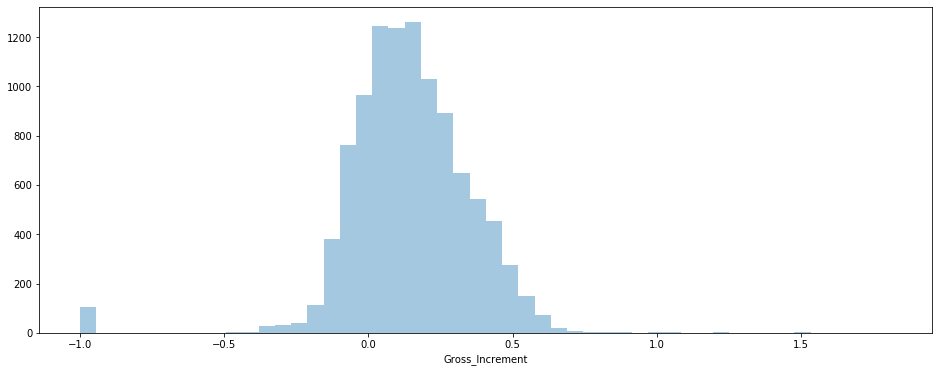

In [180]:
plt.figure(figsize=(16, 6))
sns.distplot(BGL['Gross_Increment'],kde=False)

In [181]:
BGL = BGL.drop(['Gross_Price','Last_Yr_Gross_Price'], axis=1)

In [182]:
#Creation of Vehicle_Type Feature for Feature Engineering

In [183]:
BGL["Vehicle_Type"] = BGL["Vehicle_Fuel_Type"] + BGL["Vehicle_Transmission"]

In [184]:
BGL.head()

,Sale,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,No_Claims_Discount,Credit_Score,Previous_Discount,Gross_Increment,Vehicle_Type
0,1,8,I,Passive,0.00000,56,M,E,Z,17,3,0,1,4999,4,2,H,5,999,P,M,9,581,0,-0.01248,PM
1,0,8,I,Passive,0.00000,52,M,E,Z,17,8,0,7,7000,14,3,H,3,1149,P,M,9,526,0,0.08812,PM
2,1,8,I,Passive,0.00000,60,D,E,Z,17,11,0,3,11999,2,1,H,5,1499,P,M,7,586,1,0.20604,PM
3,1,8,I,Passive,0.00000,54,S,U,Z,17,5,0,3,12000,15,5,E,5,2902,D,A,9,540,0,0.00440,DA
4,1,7,T,Passive,0.00000,60,S,R,5,3,3,0,4,5000,17,8,H,3,1300,P,M,8,531,1,-0.01996,PM


In [185]:
BGL["Vehicle_Type"].nunique()

5

In [186]:
BGL["Vehicle_Type"].value_counts()

DM    3944
PM    3592
DA    1576
PA    1168
EA       5
Name: Vehicle_Type, dtype: int64

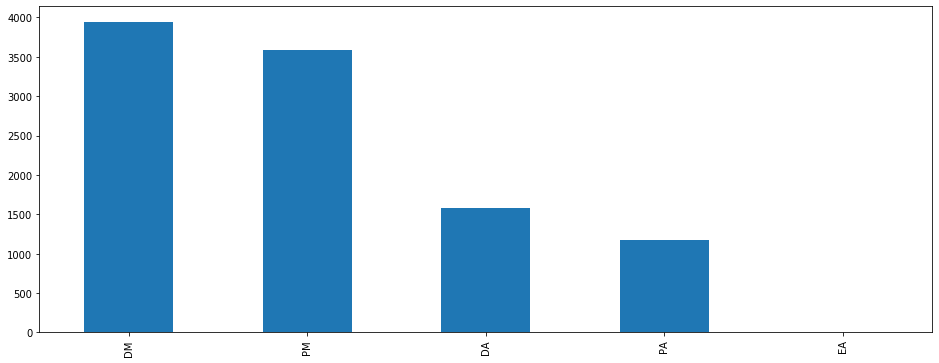

In [187]:
plt.figure(figsize=(16, 6))
BGL['Vehicle_Type'].value_counts().plot(kind='bar')

In [188]:
BGL = BGL.drop(['Vehicle_Fuel_Type','Vehicle_Transmission'], axis=1)

In [189]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 24 columns):
Sale                                      10285 non-null int64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null object
Renewal_Offer_Type                        10285 non-null object
Number_Of_Attempted_Policy_Ammendments    10285 non-null float64
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null object
Driver_Occupation_Status                  10285 non-null object
Driver_Licence_Type                       10285 non-null object
Driver_Years_Licence_Held                 10285 non-null int64
Geographical_Area                         10285 non-null int64
Number_Of_Named_Drivers                   10285 non-null int64
Overnight_Parking                         10285 non-null int64
Annual_Mileage                            10285 non-null int64
Ve

In [190]:
#BGL.to_csv('BGL2.csv')

In [191]:
#DataTypes Rectification

In [192]:
BGL.Number_Of_Attempted_Policy_Ammendments = BGL.Number_Of_Attempted_Policy_Ammendments.astype(int)

In [193]:
for c in BGL.columns:
    col_type = BGL[c].dtype
    if col_type == 'object':
        BGL[c] = BGL[c].astype('category')

In [194]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 24 columns):
Sale                                      10285 non-null int64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null category
Renewal_Offer_Type                        10285 non-null category
Number_Of_Attempted_Policy_Ammendments    10285 non-null int32
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null category
Driver_Occupation_Status                  10285 non-null category
Driver_Licence_Type                       10285 non-null category
Driver_Years_Licence_Held                 10285 non-null int64
Geographical_Area                         10285 non-null int64
Number_Of_Named_Drivers                   10285 non-null int64
Overnight_Parking                         10285 non-null int64
Annual_Mileage                            10285 non-null 

In [195]:
#Target Variable Assignment

In [196]:
y = BGL['Sale']

In [197]:
#Label Encoding for Categorical Features

In [198]:
BGL["First_Contact_Channel"] = BGL["First_Contact_Channel"].astype('category')
BGL["First_Contact_Channel"] = BGL["First_Contact_Channel"].cat.codes

In [199]:
BGL["Renewal_Offer_Type"] = BGL["Renewal_Offer_Type"].astype('category')
BGL["Renewal_Offer_Type"] = BGL["Renewal_Offer_Type"].cat.codes

In [200]:
BGL["Driver_Marital_Status"] = BGL["Driver_Marital_Status"].astype('category')
BGL["Driver_Marital_Status"] = BGL["Driver_Marital_Status"].cat.codes

In [201]:
BGL["Driver_Occupation_Status"] = BGL["Driver_Occupation_Status"].astype('category')
BGL["Driver_Occupation_Status"] = BGL["Driver_Occupation_Status"].cat.codes

In [202]:
BGL["Driver_Licence_Type"] = BGL["Driver_Licence_Type"].astype('category')
BGL["Driver_Licence_Type"] = BGL["Driver_Licence_Type"].cat.codes

In [203]:
BGL["Vehicle_Body_Type"] = BGL["Vehicle_Body_Type"].astype('category')
BGL["Vehicle_Body_Type"] = BGL["Vehicle_Body_Type"].cat.codes

In [204]:
BGL["Vehicle_Type"] = BGL["Vehicle_Type"].astype('category')
BGL["Vehicle_Type"] = BGL["Vehicle_Type"].cat.codes

In [205]:
BGL.head()

,Sale,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,No_Claims_Discount,Credit_Score,Previous_Discount,Gross_Increment,Vehicle_Type
0,1,8,0,1,0,56,3,0,5,17,3,0,1,4999,4,2,3,5,999,9,581,0,-0.01248,4
1,0,8,0,1,0,52,3,0,5,17,8,0,7,7000,14,3,3,3,1149,9,526,0,0.08812,4
2,1,8,0,1,0,60,2,0,5,17,11,0,3,11999,2,1,3,5,1499,7,586,1,0.20604,4
3,1,8,0,1,0,54,5,6,5,17,5,0,3,12000,15,5,2,5,2902,9,540,0,0.00440,0
4,1,7,1,1,0,60,5,4,2,3,3,0,4,5000,17,8,3,3,1300,8,531,1,-0.01996,4


In [206]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 24 columns):
Sale                                      10285 non-null int64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null int8
Renewal_Offer_Type                        10285 non-null int8
Number_Of_Attempted_Policy_Ammendments    10285 non-null int32
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null int8
Driver_Occupation_Status                  10285 non-null int8
Driver_Licence_Type                       10285 non-null int8
Driver_Years_Licence_Held                 10285 non-null int64
Geographical_Area                         10285 non-null int64
Number_Of_Named_Drivers                   10285 non-null int64
Overnight_Parking                         10285 non-null int64
Annual_Mileage                            10285 non-null int64
Vehicle_Age   

In [207]:
#Modelling Dataset has been prepared and Correlation is checked to see if any more variables need to be removed.

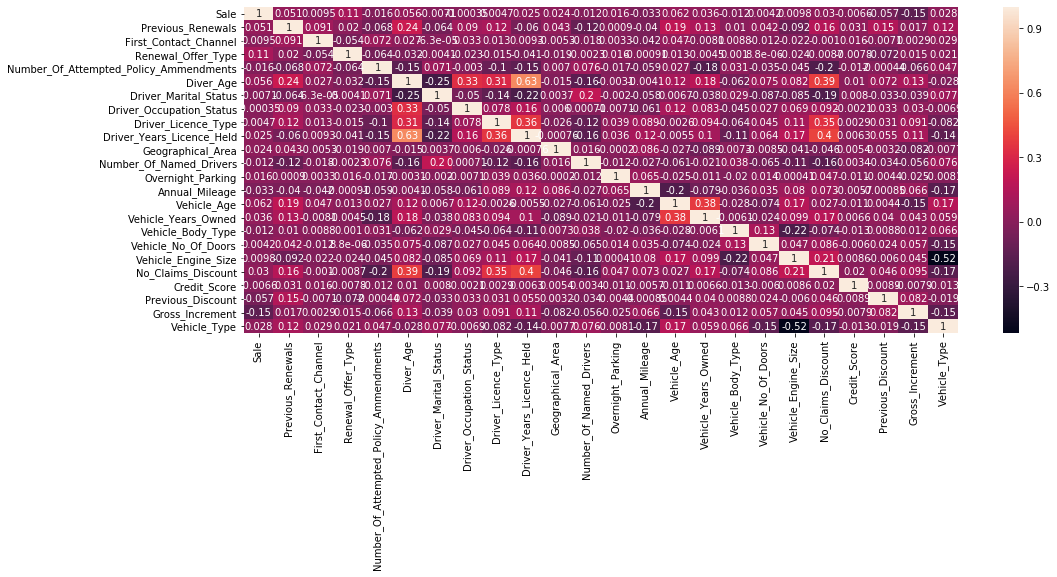

In [208]:
plt.figure(figsize=(16, 6))
sns.heatmap(BGL.corr(), annot = True)

In [209]:
BGL.columns

Index(['Sale', 'Previous_Renewals', 'First_Contact_Channel',
       'Renewal_Offer_Type', 'Number_Of_Attempted_Policy_Ammendments',
       'Diver_Age', 'Driver_Marital_Status', 'Driver_Occupation_Status',
       'Driver_Licence_Type', 'Driver_Years_Licence_Held', 'Geographical_Area',
       'Number_Of_Named_Drivers', 'Overnight_Parking', 'Annual_Mileage',
       'Vehicle_Age', 'Vehicle_Years_Owned', 'Vehicle_Body_Type',
       'Vehicle_No_Of_Doors', 'Vehicle_Engine_Size', 'No_Claims_Discount',
       'Credit_Score', 'Previous_Discount', 'Gross_Increment', 'Vehicle_Type'],
      dtype='object')

In [210]:
#Model 1
#Feature Selection through Information Value
#Modelling by Logistic Regression

In [211]:
#Feature Selection by Information Value (Features with an info_value >= 0.02 were selected )

In [212]:
iv_quick_check = sc.iv(BGL,'Sale')
iv_quick_check.reset_index()

,index,variable,info_value
0,0,Vehicle_Engine_Size,0.09076
1,19,Credit_Score,0.08852
2,18,Renewal_Offer_Type,0.05353
3,9,Diver_Age,0.04187
4,7,Annual_Mileage,0.03345
5,1,Driver_Years_Licence_Held,0.03317
6,12,Vehicle_Age,0.03165
7,21,Gross_Increment,0.02548
8,16,Previous_Renewals,0.02058
9,17,Vehicle_Years_Owned,0.01768


In [213]:
#Modelling by Logistic Regression

In [214]:
 X = BGL[['Vehicle_Engine_Size','Credit_Score','Renewal_Offer_Type','Diver_Age','Annual_Mileage','Driver_Years_Licence_Held','Vehicle_Age','Gross_Increment','Previous_Renewals']]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [216]:
logmodel = LogisticRegression(penalty='l1',C=100)

In [217]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
predictions = logmodel.predict(X_test)

In [219]:
logmodel.coef_

array([[ 7.54432075e-05, -2.10622994e-05,  1.44141729e+00,
         1.32058394e-02, -1.67559041e-05,  8.98928906e-05,
         5.03912803e-03, -1.90893693e+00,  5.42223546e-02]])

In [220]:
#Classification Report & Confusion Matrix

In [221]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.22      0.31      1164
           1       0.65      0.90      0.76      1922

    accuracy                           0.64      3086
   macro avg       0.61      0.56      0.53      3086
weighted avg       0.62      0.64      0.59      3086



In [222]:
print(confusion_matrix(y_test,predictions))

[[ 251  913]
 [ 194 1728]]


In [223]:
probs = logmodel.predict_proba(X_test)

In [224]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [225]:
#AUC of Model 1

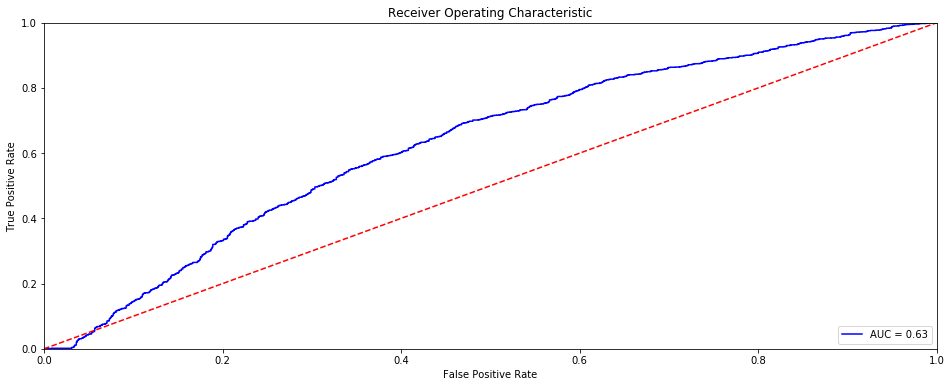

In [226]:
plt.figure(figsize=(16, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [227]:
BGL = BGL.drop(['Sale'], axis=1)

In [228]:
BGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 23 columns):
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null int8
Renewal_Offer_Type                        10285 non-null int8
Number_Of_Attempted_Policy_Ammendments    10285 non-null int32
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null int8
Driver_Occupation_Status                  10285 non-null int8
Driver_Licence_Type                       10285 non-null int8
Driver_Years_Licence_Held                 10285 non-null int64
Geographical_Area                         10285 non-null int64
Number_Of_Named_Drivers                   10285 non-null int64
Overnight_Parking                         10285 non-null int64
Annual_Mileage                            10285 non-null int64
Vehicle_Age                               10285 non-null int64
Vehicle_Years_

In [229]:
#Model 2
#Standard Scaling of Dataset
#Feature Selection through Information Value 
#Modelling by Logistic Regression

In [230]:
#Standard Scaling of Dataset

In [231]:
scaler = StandardScaler()
scaler.fit(BGL)
scaled_data=scaler.transform(BGL)

In [232]:
BGL_Scaled = pd.DataFrame(scaled_data, columns = ['Previous_Renewals', 'First_Contact_Channel', 'Renewal_Offer_Type','Number_Of_Attempted_Policy_Ammendments', 'Diver_Age','Driver_Marital_Status', 'Driver_Occupation_Status','Driver_Licence_Type', 'Driver_Years_Licence_Held', 'Geographical_Area','Number_Of_Named_Drivers', 'Overnight_Parking', 'Annual_Mileage','Vehicle_Age', 'Vehicle_Years_Owned', 'Vehicle_Body_Type','Vehicle_No_Of_Doors', 'Vehicle_Engine_Size','No_Claims_Discount', 'Credit_Score', 'Previous_Discount','Gross_Increment', 'Vehicle_Type'])

In [233]:
BGL_Scaled.head()

,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,No_Claims_Discount,Credit_Score,Previous_Discount,Gross_Increment,Vehicle_Type
0,4.18237,-0.19826,0.19879,-0.41834,0.65378,-0.47181,-0.57401,0.33598,-0.31517,-1.03314,-0.50120,-2.07062,-0.81238,-0.84856,-0.33840,0.38384,0.54205,-1.70085,0.60542,0.03388,-0.33486,-0.71283,1.18957
1,4.18237,-0.19826,0.19879,-0.41834,0.33580,-0.47181,-0.57401,0.33598,-0.31517,0.44963,-0.50120,3.18449,-0.24661,1.29525,0.03021,0.38384,-1.78718,-1.36329,0.60542,-0.10891,-0.33486,-0.24713,1.18957
2,4.18237,-0.19826,0.19879,-0.41834,0.97176,-1.39346,-0.57401,0.33598,-0.31517,1.33930,-0.50120,-0.31892,1.16683,-1.27732,-0.70701,0.38384,0.54205,-0.57567,-0.14151,0.04686,2.98631,0.29878,1.18957
3,4.18237,-0.19826,0.19879,-0.41834,0.49479,1.37151,2.47227,0.33598,-0.31517,-0.44003,-0.50120,-0.31892,1.16711,1.50963,0.76743,-0.94987,0.54205,2.58157,0.60542,-0.07257,-0.33486,-0.63471,-1.34429
4,3.57049,5.04377,0.19879,-0.41834,0.97176,1.37151,1.45684,-4.48351,-1.86080,-1.03314,-0.50120,0.55693,-0.81210,1.93839,1.87326,0.38384,-1.78718,-1.02349,0.23196,-0.09593,2.98631,-0.74747,1.18957


In [234]:
z = pd.DataFrame(y)

In [235]:
BGL_Scaled.reset_index(drop=True, inplace=True)
z.reset_index(drop=True, inplace=True)

In [236]:
BGL_Scaled = pd.concat([BGL_Scaled, z], axis=1)

In [237]:
BGL_Scaled.head()

,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,Number_Of_Attempted_Policy_Ammendments,Diver_Age,Driver_Marital_Status,Driver_Occupation_Status,Driver_Licence_Type,Driver_Years_Licence_Held,Geographical_Area,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,No_Claims_Discount,Credit_Score,Previous_Discount,Gross_Increment,Vehicle_Type,Sale
0,4.18237,-0.19826,0.19879,-0.41834,0.65378,-0.47181,-0.57401,0.33598,-0.31517,-1.03314,-0.50120,-2.07062,-0.81238,-0.84856,-0.33840,0.38384,0.54205,-1.70085,0.60542,0.03388,-0.33486,-0.71283,1.18957,1
1,4.18237,-0.19826,0.19879,-0.41834,0.33580,-0.47181,-0.57401,0.33598,-0.31517,0.44963,-0.50120,3.18449,-0.24661,1.29525,0.03021,0.38384,-1.78718,-1.36329,0.60542,-0.10891,-0.33486,-0.24713,1.18957,0
2,4.18237,-0.19826,0.19879,-0.41834,0.97176,-1.39346,-0.57401,0.33598,-0.31517,1.33930,-0.50120,-0.31892,1.16683,-1.27732,-0.70701,0.38384,0.54205,-0.57567,-0.14151,0.04686,2.98631,0.29878,1.18957,1
3,4.18237,-0.19826,0.19879,-0.41834,0.49479,1.37151,2.47227,0.33598,-0.31517,-0.44003,-0.50120,-0.31892,1.16711,1.50963,0.76743,-0.94987,0.54205,2.58157,0.60542,-0.07257,-0.33486,-0.63471,-1.34429,1
4,3.57049,5.04377,0.19879,-0.41834,0.97176,1.37151,1.45684,-4.48351,-1.86080,-1.03314,-0.50120,0.55693,-0.81210,1.93839,1.87326,0.38384,-1.78718,-1.02349,0.23196,-0.09593,2.98631,-0.74747,1.18957,1


In [238]:
#Feature Selection through Information Value (Features with an info_value >= 0.02 were selected )

In [239]:
iv_quick_check = sc.iv(BGL_Scaled,'Sale')
iv_quick_check.reset_index()

,index,variable,info_value
0,0,Vehicle_Engine_Size,0.09076
1,19,Credit_Score,0.08852
2,18,Renewal_Offer_Type,0.05353
3,9,Diver_Age,0.04187
4,7,Annual_Mileage,0.03345
5,1,Driver_Years_Licence_Held,0.03317
6,12,Vehicle_Age,0.03165
7,21,Gross_Increment,0.02548
8,16,Previous_Renewals,0.02058
9,17,Vehicle_Years_Owned,0.01768


In [240]:
#Modelling by Logistic Regression

In [241]:
X1 = BGL[['Vehicle_Engine_Size','Credit_Score','Renewal_Offer_Type','Diver_Age','Annual_Mileage','Driver_Years_Licence_Held','Vehicle_Age','Gross_Increment','Previous_Renewals']]

In [242]:
y1 = y

In [243]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [244]:
logmodel1 = LogisticRegression(penalty='l1', C=100)

In [245]:
logmodel1.fit(X1_train,y1_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
predictions1 = logmodel.predict(X1_test)

In [247]:
logmodel1.coef_

array([[ 7.53382230e-05, -2.10624373e-05,  1.44109776e+00,
         1.31970814e-02, -1.67578258e-05,  1.01262764e-04,
         5.03729832e-03, -1.90878663e+00,  5.42164611e-02]])

In [248]:
#Classification Report & Confusion Matrix

In [249]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.56      0.22      0.31      1164
           1       0.65      0.90      0.76      1922

    accuracy                           0.64      3086
   macro avg       0.61      0.56      0.53      3086
weighted avg       0.62      0.64      0.59      3086



In [250]:
print(confusion_matrix(y1_test,predictions1))

[[ 251  913]
 [ 194 1728]]


In [251]:
probs1 = logmodel.predict_proba(X1_test)

In [252]:
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y1_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

In [253]:
#AUC of Model 2

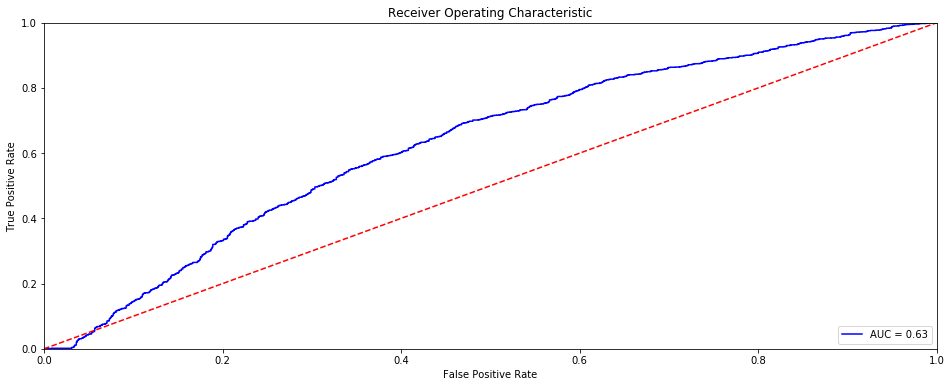

In [254]:
plt.figure(figsize=(16, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
#Model 3
#Feature Selection through Extra Trees Classifier
#Modelling by Logistic Regression

In [256]:
#Feature Selection through Extra Trees Classifier (Top 10 Features were selected)

[0.04290492 0.0090015  0.01407419 0.03678242 0.06523666 0.04667064
 0.02887162 0.01441205 0.06045949 0.05868431 0.01976778 0.04213907
 0.06505395 0.0613053  0.05737061 0.03312535 0.02631847 0.06024693
 0.03515226 0.06618051 0.00611804 0.11442599 0.03569796]


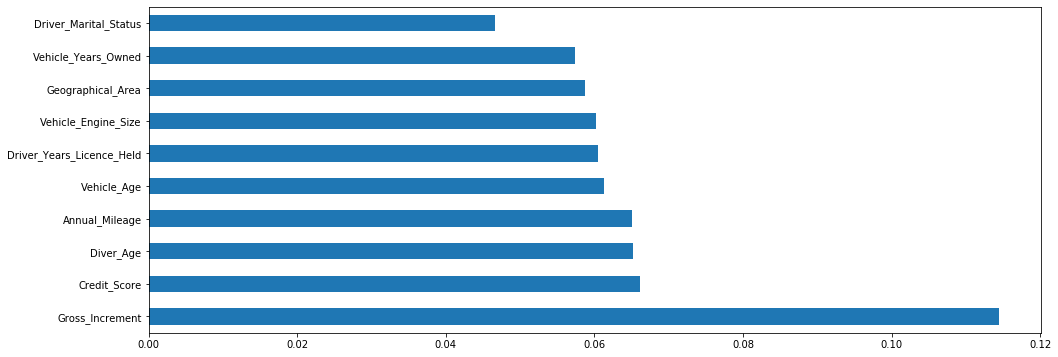

In [257]:
plt.figure(figsize=(16, 6))
model = ExtraTreesClassifier()
model.fit(BGL,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=BGL.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [258]:
#Modelling by Logistic Regression

In [259]:
A = BGL[['Vehicle_Engine_Size','Credit_Score','Diver_Age','Annual_Mileage','Driver_Years_Licence_Held','Vehicle_Age','Gross_Increment','Geographical_Area','Driver_Marital_Status','Vehicle_Years_Owned']]

In [260]:
b = y

In [261]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=101)

In [262]:
logmodel2 = LogisticRegression(penalty='l1', C=100)

In [263]:
logmodel2.fit(A_train,b_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
predictions2 = logmodel2.predict(A_test)

In [265]:
logmodel2.coef_

array([[ 3.27480643e-05, -8.79921953e-06,  1.47644677e-02,
        -1.57244327e-05, -3.76253412e-03,  5.92546922e-03,
        -1.80511351e+00,  1.10195556e-02, -1.14961962e-02,
         1.70600181e-02]])

In [266]:
#Classification Report & Confusion Matrix

In [267]:
print(classification_report(b_test,predictions2))

              precision    recall  f1-score   support

           0       0.57      0.19      0.29      1164
           1       0.65      0.91      0.76      1922

    accuracy                           0.64      3086
   macro avg       0.61      0.55      0.52      3086
weighted avg       0.62      0.64      0.58      3086



In [268]:
print(confusion_matrix(b_test,predictions2))

[[ 222  942]
 [ 167 1755]]


In [269]:
probs2 = logmodel2.predict_proba(A_test)

In [270]:
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(b_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

In [271]:
#AUC of Model 3

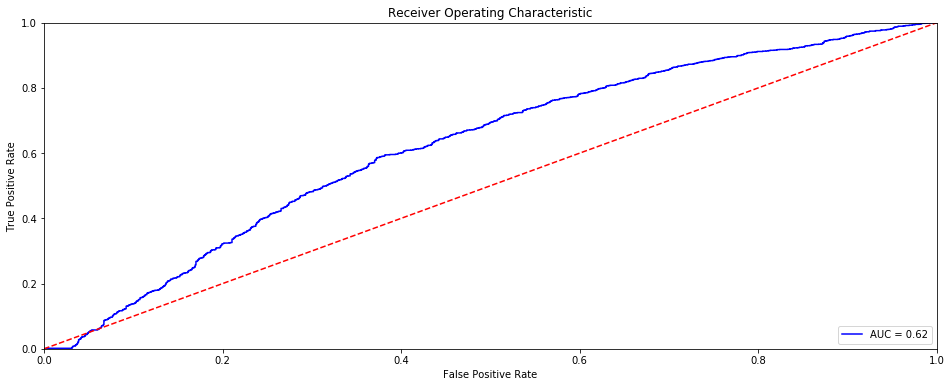

In [272]:
plt.figure(figsize=(16, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [273]:
#Model 4
#Direct Modelling by Extra Trees Classifier

In [274]:
d = y

In [275]:
C = BGL

In [276]:
#Modelling by Extra Trees Classifier

In [277]:
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.3, random_state=101)

In [278]:
model1 = ExtraTreesClassifier()
model1.fit(C_train,d_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [279]:
predictions3 = model1.predict(C_test)

In [280]:
#Classification Report & Confusion Matrix

In [281]:
print(classification_report(d_test,predictions3))

              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1164
           1       0.69      0.67      0.68      1922

    accuracy                           0.60      3086
   macro avg       0.58      0.58      0.58      3086
weighted avg       0.61      0.60      0.61      3086



In [282]:
print(confusion_matrix(d_test,predictions3))

[[ 575  589]
 [ 631 1291]]


In [283]:
probs3 = model1.predict_proba(C_test)

In [284]:
preds3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(d_test, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)

In [285]:
#AUVC of Model 4

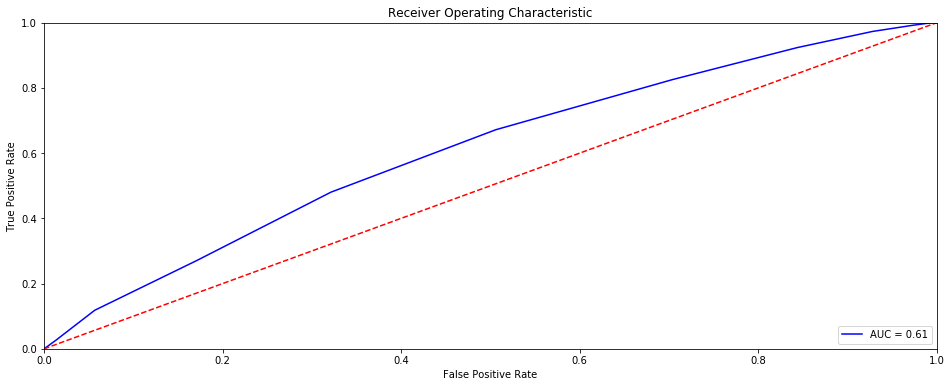

In [286]:
plt.figure(figsize=(16, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [287]:
#Model 5
#Direct Modelling by Logistic Regression

In [288]:
e = y

In [289]:
#Modelling by Logistic Regression

In [290]:
BGL_train, BGL_test, e_train, e_test = train_test_split(BGL, e, test_size=0.3, random_state=101)

In [291]:
logmodel3 = LogisticRegression(penalty='l1',C=100)

In [292]:
logmodel3.fit(BGL_train,e_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [293]:
predictions4 = logmodel3.predict(BGL_test)

In [294]:
logmodel3.coef_

array([[ 5.79723945e-02,  1.74908489e-01,  1.41265348e+00,
        -1.65595637e-02,  1.43336970e-02, -2.27593794e-03,
        -2.67781368e-02, -2.16480013e-03, -3.35940888e-04,
         1.19326468e-02,  1.71170254e-02,  4.03845188e-02,
        -1.95661776e-05,  2.63251863e-03,  1.78174161e-02,
        -7.49733966e-03,  3.56860765e-02,  8.11739447e-05,
        -3.83553060e-03, -2.41773467e-05, -2.65428915e-01,
        -1.86716950e+00,  1.11610626e-03]])

In [295]:
#Classification Report & Confusion Matrix

In [296]:
print(classification_report(e_test,predictions4))

              precision    recall  f1-score   support

           0       0.56      0.23      0.33      1164
           1       0.66      0.89      0.76      1922

    accuracy                           0.64      3086
   macro avg       0.61      0.56      0.54      3086
weighted avg       0.62      0.64      0.59      3086



In [297]:
print(confusion_matrix(e_test,predictions4))

[[ 267  897]
 [ 210 1712]]


In [298]:
probs4 = logmodel3.predict_proba(BGL_test)

In [299]:
preds4 = probs4[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(e_test, preds4)
roc_auc4 = metrics.auc(fpr4, tpr4)

In [300]:
#AUC of Model 5

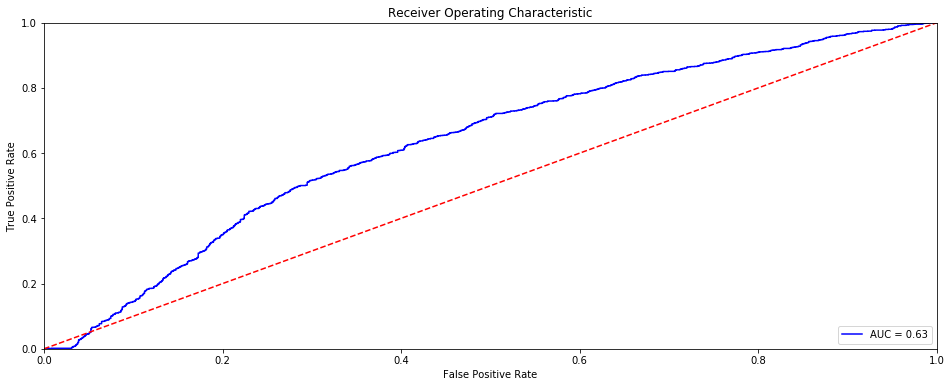

In [301]:
plt.figure(figsize=(16, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [302]:
#Model 6
#Direct Modelling by LGBM

In [303]:
def lightmodel (y,x):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23,stratify=y)

    #     train_data = LGBM.Dataset(x_train,label = y_train)
    #     test_data = LGBM.Dataset(x_test,label = y_test)

    lgb = LGBMClassifier(
        nthread=4,
        is_unbalance=False,
        n_estimators=54,
        learning_rate=0.05,
        num_leaves=25,
        feature_fraction= 0.7,
        bagging_fraction= 0.7,
        max_depth=1000,
        min_data_in_leaf=1000,
        max_bin=200,
        #min_split_gain=0.0222415,
        min_child_weight=40,
        silent=-1,
        verbose=-1,
        #scale_pos_weight=50
        )    

    lgb.fit(X=x_train, y = y_train, eval_set=[(x_train, y_train), (x_test, y_test)], 
                                eval_metric= 'auc', verbose= 10,early_stopping_rounds= 500)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = x_train.columns
    fold_importance_df["importance"] =  lgb.feature_importances_
    fold_importance_df = fold_importance_df.sort_values(['importance'],ascending=False)

    oof_preds = lgb.predict_proba(x_test)[:, 1]
    train_preds = lgb.predict_proba(x_train)[:, 1]

    train_perf_1 = sc.perf_eva(y_train.to_list(),train_preds,title ='lgbm:model1-train')
    test_perf_1 = sc.perf_eva(y_test,oof_preds,title ='lgbm:model1-test')

    print("accuracy is ", accuracy_score(y_test,lgb.predict(x_test)), " roc is ", roc_auc_score(y_test,oof_preds))
    
    return lgb,fold_importance_df


In [304]:
x = BGL

In [305]:
#AUC of Model 6

Training until validation scores don't improve for 500 rounds
[10]	training's auc: 0.665007	training's binary_logloss: 0.652764	valid_1's auc: 0.670358	valid_1's binary_logloss: 0.6523
[20]	training's auc: 0.66638	training's binary_logloss: 0.642473	valid_1's auc: 0.672056	valid_1's binary_logloss: 0.641379
[30]	training's auc: 0.669668	training's binary_logloss: 0.636317	valid_1's auc: 0.674007	valid_1's binary_logloss: 0.635206
[40]	training's auc: 0.671328	training's binary_logloss: 0.631404	valid_1's auc: 0.675213	valid_1's binary_logloss: 0.630103
[50]	training's auc: 0.673969	training's binary_logloss: 0.62835	valid_1's auc: 0.676663	valid_1's binary_logloss: 0.627331
Did not meet early stopping. Best iteration is:
[52]	training's auc: 0.674284	training's binary_logloss: 0.62788	valid_1's auc: 0.676954	valid_1's binary_logloss: 0.626899


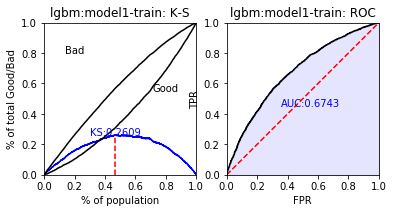

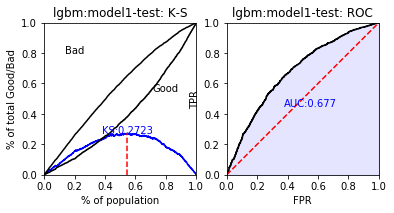

accuracy is  0.653596889176928  roc is  0.6769536444922329


In [306]:
lgb1, importance1 = lightmodel(y,x)

In [307]:
#Feature Selection as deemed important by LGBM

In [308]:
importance1

,feature,importance
21,Gross_Increment,77
4,Diver_Age,40
19,Credit_Score,29
14,Vehicle_Years_Owned,17
8,Driver_Years_Licence_Held,13
0,Previous_Renewals,12
17,Vehicle_Engine_Size,10
13,Vehicle_Age,8
18,No_Claims_Discount,7
22,Vehicle_Type,7


In [309]:
tf.get_logger().setLevel('ERROR')

In [310]:
BGL_Scaled = BGL_Scaled.drop(['Sale'], axis=1)

In [311]:
BGL_Scaled_train, BGL_Scaled_test, y_train, y_test= train_test_split(BGL_Scaled,y, test_size=0.3, random_state=101)

In [312]:
BGL_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 23 columns):
Previous_Renewals                         10285 non-null float64
First_Contact_Channel                     10285 non-null float64
Renewal_Offer_Type                        10285 non-null float64
Number_Of_Attempted_Policy_Ammendments    10285 non-null float64
Diver_Age                                 10285 non-null float64
Driver_Marital_Status                     10285 non-null float64
Driver_Occupation_Status                  10285 non-null float64
Driver_Licence_Type                       10285 non-null float64
Driver_Years_Licence_Held                 10285 non-null float64
Geographical_Area                         10285 non-null float64
Number_Of_Named_Drivers                   10285 non-null float64
Overnight_Parking                         10285 non-null float64
Annual_Mileage                            10285 non-null float64
Vehicle_Age                               1028

In [313]:
previous_renewals = tf.feature_column.numeric_column('Previous_Renewals')

In [314]:
first_contact_channel = tf.feature_column.numeric_column('First_Contact_Channel')

In [315]:
renewal_offer_type = tf.feature_column.numeric_column('Renewal_Offer_Type')

In [316]:
number_of_attempted_policy_ammendments = tf.feature_column.numeric_column('Number_Of_Attempted_Policy_Ammendments')

In [317]:
diver_age = tf.feature_column.numeric_column('Diver_Age')

In [318]:
driver_marital_status = tf.feature_column.numeric_column('Driver_Marital_Status')

In [319]:
driver_occupation_status = tf.feature_column.numeric_column('Driver_Occupation_Status')

In [320]:
driver_licence_type = tf.feature_column.numeric_column('Driver_Licence_Type')

In [321]:
driver_years_licence_held = tf.feature_column.numeric_column('Driver_Years_Licence_Held')

In [322]:
geographical_area = tf.feature_column.numeric_column('Geographical_Area')

In [323]:
number_of_named_drivers = tf.feature_column.numeric_column('Number_Of_Named_Drivers')

In [324]:
overnight_parking = tf.feature_column.numeric_column('Overnight_Parking')

In [325]:
annual_mileage = tf.feature_column.numeric_column('Annual_Mileage')

In [326]:
vehicle_age = tf.feature_column.numeric_column('Vehicle_Age')

In [327]:
vehicle_years_owned = tf.feature_column.numeric_column('Vehicle_Years_Owned')

In [328]:
vehicle_body_type = tf.feature_column.numeric_column('Vehicle_Body_Type')

In [329]:
vehicle_no_of_doors = tf.feature_column.numeric_column('Vehicle_No_Of_Doors')

In [330]:
vehicle_engine_size = tf.feature_column.numeric_column('Vehicle_Engine_Size')

In [331]:
no_claims_discount = tf.feature_column.numeric_column('No_Claims_Discount')

In [332]:
credit_score = tf.feature_column.numeric_column('Credit_Score')

In [333]:
previous_discount = tf.feature_column.numeric_column('Previous_Discount')

In [334]:
gross_increment = tf.feature_column.numeric_column('Gross_Increment')

In [335]:
vehicle_type = tf.feature_column.numeric_column('Vehicle_Type')

In [336]:
feature_col = [previous_renewals,first_contact_channel,renewal_offer_type,number_of_attempted_policy_ammendments,diver_age, driver_marital_status,driver_occupation_status,driver_licence_type,driver_years_licence_held, geographical_area,number_of_named_drivers,overnight_parking,annual_mileage,vehicle_age,vehicle_years_owned,vehicle_body_type,vehicle_no_of_doors,vehicle_engine_size,no_claims_discount,credit_score,previous_discount,gross_increment,vehicle_type]

In [337]:
def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(BGL_Scaled_train), y_train))
    dataset = dataset.shuffle(1000).repeat().batch(10)
    return dataset

In [338]:
def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(BGL_Scaled_test), y_test))
    return dataset.shuffle(1000).repeat().batch(10)

In [339]:
TFoptimizer_adam= tf.optimizers.Adam(learning_rate=0.01)

In [340]:
TFmodel=tf.estimator.DNNClassifier([9,9,3], feature_columns=feature_col,  optimizer=TFoptimizer_adam)

In [341]:
TFmodel.train(input_fn=lambda: train_input_fn(), steps=2000)

In [342]:
TFeval_results = TFmodel.evaluate(input_fn=eval_input_fn, steps=1)

In [343]:
TFeval_results['auc']

0.5

In [344]:
#BGL.head()

In [345]:
#type(BGL)

In [346]:
#y.head()

In [347]:
#type(y)

In [348]:
#BGL.to_csv('BGL1.csv')

In [349]:
#y = pd.DataFrame(y)

In [350]:
#y.to_csv('y1.csv')